# Sommaire

* [Chapitre 1 : Etude univariée](#chapter1)
    * [Rappel du projet](#section_1_1)
        * [Sujet projet 3](#section_1_1_1)
        * [Choix d'application](#section_1_1_2)
        * [Importation des données](#section_1_1_3)        
    * [Note pour l'application](#section_1_2)
        * [Choix des notes par variable](#section_1_2_1)
        * [Calcul de la note](#section_1_2_2)        
    * [Analyse univariée](#section_1_3)
        * [ANOVA](#section_1_3_1)
        * [Calcul de eta² et des p-values](#section_1_3_2)
    
* [Chapitre 2 : Etude bivariée](#chapter2)
    * [Matrice de corrélation](#section_2_1)
    * [Variable négative](#section_2_2)
        * [Sucre et glucide](#section_2_2_1)
        * [Sucre et score négatif](#section_2_2_2)
        * [Glucide et score négatif](#section_2_2_3)
        * [Energie et glucide](#section_2_2_4)
        * [Energie et acides gras saturés](#section_2_2_5)
        * [Energie et score négatif](#section_2_2_6)
    * [Variable positive](#section_2_3)
        * [Fibre et score positif](#section_2_3_1)
        * [Protéine et score positif](#section_2_3_2)
        * [Protéine et energie](#section_2_3_3)
        * [Protéine et sodium](#section_2_3_4)
        * [Protéine et score négatif](#section_2_3_4)
    * [Note](#section_2_4)
        * [Note et glucide](#section_2_4_1)
        * [Note et energie](#section_2_4_2)
        * [Note et sodium](#section_2_4_3)
        * [Note et fibre](#section_2_4_4)
        * [Note et protéine](#section_2_4_5)
        * [Note et score négatif](#section_2_4_6)
        * [Note et score postif](#section_2_4_7)
        
* [Chapitre 3 : Analyse en Composante Principales](#chapter3)
    * [Création de fonctions](#section_3_1)
    * [Cercle des corrélations et projection des individus](#section_3_2)
        * [Eboulis des valeurs propres](#section_3_2_1)
        * [Cercle des corrélations et projection des individus](#section_3_2_2)
        * [Traitement des outliers](#section_3_2_3)
    * [Composantes moins pertinentes](#section_3_3)
   
* [Chapitre 4 : Mise en place de l'application](#chapter4)
    * [Définition des fonctions nécessaires](#section_4_1)
    * [Application](#section_4_2)

<a class="anchor" id="chapter1"></a>
# Chapitre 1 : Etude univariée 

<a class="anchor" id="section_1_1"></a>
## Rappel du projet
<a class="anchor" id="section_1_1_1"></a>
### Sujet projet 3

**Projet 3 : Concevez une application au service de la santé publique**

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.

Le jeu de données Open Food Facts contient : 
    - Les informations générales sur la fiche du produit : nom, date de modification, etc.
    - Un ensemble de tags : catégorie du produit, localisation, origine, etc.
    - Les ingrédients composant les produits et leurs additifs éventuels.
    - Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.
    
Après avoir lu l’appel à projets, voici les différentes étapes que vous avez identifiées :

Traiter le jeu de données en :
- Réflechissant à une idée d'application
- Repérant des variables pertinentes pour les traitements à venir, et nécessaires pour votre idée d'application,
- Nettoyant les données en :
 - mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
 - identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.
- Automatisant ces traitements pour éviter de répéter ces opérations
   

**Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.**

**Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.**

**Justifier votre idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.**

**Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.**

<a class="anchor" id="section_1_1_2"></a>
### Choix de l'application

L'application choisie a pour but d'indiquer le taux de sucre pour une portion donnée, de la comparer au recommendation (30 g/j/personnes) ainsi qu'une note entre 0 et 4 et un score (similaire au nutriscore) d'un produit que nous trouvons en France.
Plusieurs cas de figures sont envisagés :
- Si le produit est identifié et est unique, la quantité de sucre sera indiqué et :
    - s'il appartient au premier quart des meilleurs produits, alors un radar ainsi que sa note sera affiché
    - s'il n'appartient pas au premier quart des meilleurs produits, alors un autre produit de la même catégorie sera proposé et sera comparé avec le produit entré sur un radar. Les notes des deux produits seront affichés.
- Si le produit est identifié mais n'est pas unique ou qu'il n'est pas trouvé, alors l'utilisateur devra entrer les valeurs nutritionnelles aini que la catégorie du produit (choix multiple). Une note sera alors attribué au produit et un autre produit de la même catégorie se trouvant dans le premier quart des produits déjà présents dans la base de données sera aussi proposé. Les deux produits seront comparés sur un radar.

Dans le cas où la quantité de sucre est supérieure aux recommendations, alors un petit message sera affiché pour indiquer que le produit est trop riche en sucre et un autre produit sera proposé.

<a class="anchor" id="section_1_1_3"></a>
### Importation des données

Nous importons les données déjà préparées dans un autre notebook. Certaines variables seront aussi renommées par souci de compréhension.

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as st

import itertools
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib.collections import LineCollection
from matplotlib import colors
from itertools import chain
from matplotlib.lines import Line2D

val_nutri = pd.read_csv("data_clean_projet_3.csv", low_memory=False)



In [64]:
val_nutri = val_nutri.set_index(["Unnamed: 0"])
val_nutri = val_nutri.reset_index(drop=True)
val_nutri.rename(columns = {'energy_100g': 'Energie', 'carbohydrates_100g': 'Glucide', 'sugars_100g': 'Sucre',
                            'fiber_100g': 'Fibre','proteins_100g': 'Protéine', 'sodium_100g': 'Sodium',
                            "fruits-vegetables-nuts_100g":"Fruit","fat_nutri" : "A_G_Saturés", 
                            "nutriscore_C" : "Nutriscore", "Graisse_portion": "A_G_Saturés_portion"},inplace=True)
display(val_nutri.columns)

Index(['product_name', 'quantity', 'nutrition_grade_fr', 'pnns_groups_1',
       'pnns_groups_2', 'nutrition-score-fr_100g', 'diff_nutriscore',
       'Nutriscore', 'Nutriscore_Lettres_C', 'Nutriscore_Lettres_exp',
       'Energie', 'Glucide', 'Sucre', 'Fibre', 'Protéine', 'Sodium', 'Fruit',
       'A_G_Saturés', 'V_Energy', 'V_Sucres_simples', 'V_Acides_gras_saturés',
       'V_Sodium', 'V_Fruits_leg', 'V_Fibres', 'V_Protéines', 'points_A',
       'points_C', 'points_C_sans_prot', 'Portion', 'Energie_portion',
       'Glucide_portion', 'Sucre_portion', 'A_G_Saturés_portion',
       'Sodium_portion', 'Fibre_portion', 'Protéine_portion', 'Fruit_portion'],
      dtype='object')

In [65]:
display(val_nutri.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54008 entries, 0 to 54007
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             54008 non-null  object 
 1   quantity                 51461 non-null  object 
 2   nutrition_grade_fr       39811 non-null  object 
 3   pnns_groups_1            54008 non-null  object 
 4   pnns_groups_2            54008 non-null  object 
 5   nutrition-score-fr_100g  39811 non-null  float64
 6   diff_nutriscore          39811 non-null  float64
 7   Nutriscore               54008 non-null  float64
 8   Nutriscore_Lettres_C     54008 non-null  object 
 9   Nutriscore_Lettres_exp   39812 non-null  object 
 10  Energie                  54008 non-null  float64
 11  Glucide                  54008 non-null  float64
 12  Sucre                    54008 non-null  float64
 13  Fibre                    54008 non-null  float64
 14  Protéine              

None

<a class="anchor" id="section_1_2"></a>
## Note pour l'application

<a class="anchor" id="section_1_2_1"></a>
### Choix des notes par variable

Pour déterminer les notes pour l'application, nous nous basons sur les variables liés aux besoins nutritionnels (sucre, énergie, acide gras saturés, sodium, fibre protéine) ainsi qu'au glucide. A l'inverse du nutriscore qui base son calcul sur 100 grammes, nous nous basons ici sur des portions le plus proche de la réalité. Par exemple, nous conisdérons pour les boissons une portion de 200 grammes et pour les huiles/vinaigrettes, 10 grammes.

Concernant l'attribution des notes, nous nous basons sur les apports nutritionnels recommandés par l'ANSES :
- Sucre : 30 g/j
- Glucide : 40-55 % de l'énergie
- Energie : 2200-2600 kJ
- Acide gras saturés : 12 % de l'énergie
- Sodium : 1.5-2.3 g
- Fibre : 30 g/j
- Protéine : 10-20 % de l'énergie

Nous considérons pour les variables négatives et pour :
- une valeur supérieure ou égales à ces recommendations, une note de 0.
- une valeur comprise entre 2/3 des recommendations et la valeur des recommendations, une note de 1
- une valeur comprise entre 1/3 et 2/3 des recommendations, une note de 2
- une valeur comprise entre 1/6 et 1/3 des recommendations, une note de 3
- une valeur comprise entre 0 et 1/6 des recommendations, une note de 4

Pour les variables positives, les notes vont de 0 à 10. Pour :
- une valeur supérieure ou égales à ces recommendations, une note de 0.
- une valeur comprise entre 2/3 des recommendations et la valeur des recommendations, une note de 1
- une valeur comprise entre 1/3 et 2/3 des recommendations, une note de 2
- une valeur comprise entre 1/6 et 1/3 des recommendations, une note de 3
- une valeur comprise entre 0 et 1/6 des recommendations, une note de comprises entre 4 et 10

Nous faisons ensuite la somme des scores dont le résultat est compris entre 0 et 40, 40 étant la meilleure note et 0 la pire. 

In [66]:
val_nutri.loc[:,"Rank_Sucre"] = np.nan
val_nutri.loc[:,"Rank_Glucide"] = np.nan
val_nutri.loc[:,"Rank_Energie"] = np.nan
val_nutri.loc[:,"Rank_AGS"] = np.nan
val_nutri.loc[:,"Rank_Sodium"] = np.nan
val_nutri.loc[:,"Rank_Protéine"] = np.nan
val_nutri.loc[:,"Rank_Fibre"] = np.nan
val_nutri.loc[:,"Note"] = np.nan
val_nutri.loc[:,"Note_L"] = np.nan
val_nutri["Rank_App"] = np.nan
val_nutri.loc[:,"Quart"] = np.nan
val_nutri.loc[:,"Val_neg"] = np.nan
val_nutri.loc[:,"Val_pos"] = np.nan

val_nutri.loc[(val_nutri["Sucre_portion"]>=0) & (val_nutri["Sucre_portion"]<5),
                  "Rank_Sucre"] = 4
val_nutri.loc[(val_nutri["Sucre_portion"]>=5) & (val_nutri["Sucre_portion"]<10),
                  "Rank_Sucre"] = 3
val_nutri.loc[(val_nutri["Sucre_portion"]>=10) & (val_nutri["Sucre_portion"]<20),
                  "Rank_Sucre"] = 2
val_nutri.loc[(val_nutri["Sucre_portion"]>=20) & (val_nutri["Sucre_portion"]<30),
                  "Rank_Sucre"] = 1
val_nutri.loc[(val_nutri["Sucre_portion"]>=30) ,"Rank_Sucre"] = 0



val_nutri.loc[(val_nutri["Fibre_portion"]==0),
                  "Rank_Fibre"] = 10
val_nutri.loc[(val_nutri["Fibre_portion"]>0) & (val_nutri["Fibre_portion"]<0.5),
                  "Rank_Fibre"] = 9
val_nutri.loc[(val_nutri["Fibre_portion"]>=0.5) & (val_nutri["Fibre_portion"]<1),
                  "Rank_Fibre"] = 8
val_nutri.loc[(val_nutri["Fibre_portion"]>=1) & (val_nutri["Fibre_portion"]<2),
                  "Rank_Fibre"] = 7
val_nutri.loc[(val_nutri["Fibre_portion"]>=2) & (val_nutri["Fibre_portion"]<3),
                  "Rank_Fibre"] = 6
val_nutri.loc[(val_nutri["Fibre_portion"]>=3) & (val_nutri["Fibre_portion"]<4),
                  "Rank_Fibre"] = 5
val_nutri.loc[(val_nutri["Fibre_portion"]>=4) & (val_nutri["Fibre_portion"]<5),
                  "Rank_Fibre"] = 4
val_nutri.loc[(val_nutri["Fibre_portion"]>=5) & (val_nutri["Fibre_portion"]<10),
                  "Rank_Fibre"] = 3
val_nutri.loc[(val_nutri["Fibre_portion"]>=10) & (val_nutri["Fibre_portion"]<20),
                  "Rank_Fibre"] = 2
val_nutri.loc[(val_nutri["Fibre_portion"]>=20) & (val_nutri["Fibre_portion"]<30),
                  "Rank_Fibre"] = 1
val_nutri.loc[(val_nutri["Fibre_portion"]>=30) ,"Rank_Fibre"] = 0


val_nutri.loc[(val_nutri["Sodium_portion"]>=0) & (val_nutri["Sodium_portion"]<0.25),
                  "Rank_Sodium"] = 4
val_nutri.loc[(val_nutri["Sodium_portion"]>=0.25) & (val_nutri["Sodium_portion"]<0.5),
                  "Rank_Sodium"] = 3
val_nutri.loc[(val_nutri["Sodium_portion"]>=0.5) & (val_nutri["Sodium_portion"]<1),
                  "Rank_Sodium"] = 2
val_nutri.loc[(val_nutri["Sodium_portion"]>=1) & (val_nutri["Sodium_portion"]<1.5),
                  "Rank_Sodium"] = 1
val_nutri.loc[(val_nutri["Sodium_portion"]>=1.5) ,"Rank_Sodium"] = 0



val_nutri.loc[(val_nutri["Energie_portion"]>=0) & (val_nutri["Energie_portion"]<350),
                  "Rank_Energie"] = 4
val_nutri.loc[(val_nutri["Energie_portion"]>=350) & (val_nutri["Energie_portion"]<700),
                  "Rank_Energie"] = 3
val_nutri.loc[(val_nutri["Energie_portion"]>=700) & (val_nutri["Energie_portion"]<1400),
                  "Rank_Energie"] = 2
val_nutri.loc[(val_nutri["Energie_portion"]>=1400) & (val_nutri["Energie_portion"]<2100),
                  "Rank_Energie"] = 1
val_nutri.loc[(val_nutri["Energie_portion"]>=2100) ,"Rank_Energie"] = 0

In [67]:
val_nutri.loc[(val_nutri['Energie_portion'].notnull()),
              "Protéine_Energie"] = (val_nutri['Protéine_portion'])*100/(val_nutri['Energie_portion'])
val_nutri.loc[(val_nutri['Energie_portion'].notnull()),
              "AGS_Energie"] = (val_nutri['A_G_Saturés_portion'])*100/(val_nutri['Energie_portion'])
val_nutri.loc[(val_nutri['Energie_portion'].notnull()),
              "Glucide_Energie"] = (val_nutri['Glucide_portion'])*100/(val_nutri['Energie_portion'])

val_nutri.loc[(val_nutri['Energie_portion']==0),"Protéine_Energie"] = 0
val_nutri.loc[(val_nutri['Energie_portion']==0),"AGS_Energie"] = 0
val_nutri.loc[(val_nutri['Energie_portion']==0),"Glucide_Energie"] = 0

val_nutri.loc[(val_nutri["Protéine_Energie"]==0),
              "Rank_Protéine"] = 10
val_nutri.loc[(val_nutri["Protéine_Energie"]>0) & (val_nutri["Protéine_Energie"]<0.25),
              "Rank_Protéine"] = 9
val_nutri.loc[(val_nutri["Protéine_Energie"]>=0.25) & (val_nutri["Protéine_Energie"]<0.5),
              "Rank_Protéine"] = 8
val_nutri.loc[(val_nutri["Protéine_Energie"]>=0.5) & (val_nutri["Protéine_Energie"]<0.75),
              "Rank_Protéine"] = 7
val_nutri.loc[(val_nutri["Protéine_Energie"]>=0.75) & (val_nutri["Protéine_Energie"]<1),
              "Rank_Protéine"] = 6
val_nutri.loc[(val_nutri["Protéine_Energie"]>=1) & (val_nutri["Protéine_Energie"]<1.5),
              "Rank_Protéine"] = 5
val_nutri.loc[(val_nutri["Protéine_Energie"]>=1.5) & (val_nutri["Protéine_Energie"]<2),
              "Rank_Protéine"] = 4
val_nutri.loc[(val_nutri["Protéine_Energie"]>=2) & (val_nutri["Protéine_Energie"]<3),
              "Rank_Protéine"] = 3
val_nutri.loc[(val_nutri["Protéine_Energie"]>=3) & (val_nutri["Protéine_Energie"]<6),
              "Rank_Protéine"] = 2
val_nutri.loc[(val_nutri["Protéine_Energie"]>=6) & (val_nutri["Protéine_Energie"]<10),
              "Rank_Protéine"] = 1
val_nutri.loc[(val_nutri["Protéine_Energie"]>=10) ,"Rank_Protéine"] = 0



val_nutri.loc[(val_nutri["AGS_Energie"]>=0) & (val_nutri["AGS_Energie"]<2),
                  "Rank_AGS"] = 4
val_nutri.loc[(val_nutri["AGS_Energie"]>=2) & (val_nutri["AGS_Energie"]<4),
                  "Rank_AGS"] = 3
val_nutri.loc[(val_nutri["AGS_Energie"]>=4) & (val_nutri["AGS_Energie"]<8),
                  "Rank_AGS"] = 2
val_nutri.loc[(val_nutri["AGS_Energie"]>=8) & (val_nutri["AGS_Energie"]<12),
                  "Rank_AGS"] = 1
val_nutri.loc[(val_nutri["AGS_Energie"]>=12) ,"Rank_AGS"] = 0


val_nutri.loc[(val_nutri["Glucide_Energie"]>=0) & (val_nutri["Glucide_Energie"]<7.5),
                  "Rank_Glucide"] = 4
val_nutri.loc[(val_nutri["Glucide_Energie"]>=7.5) & (val_nutri["Glucide_Energie"]<13),
                  "Rank_Glucide"] = 3
val_nutri.loc[(val_nutri["Glucide_Energie"]>=13) & (val_nutri["Glucide_Energie"]<26),
                  "Rank_Glucide"] = 2
val_nutri.loc[(val_nutri["Glucide_Energie"]>=26) & (val_nutri["Glucide_Energie"]<40),
                  "Rank_Glucide"] = 1
val_nutri.loc[(val_nutri["Glucide_Energie"]>=40) ,"Rank_Glucide"] = 0


<a class="anchor" id="section_1_2_2"></a>
### Calcul de la note

Maintenant que les variables ont toutes un rang, nous calculons la note finale du produit. Pour cela nous sommons les variables négatives (Sucre, glucide, énergie, acide gras saturés, sodium) et nous les soustrayons par la somme des notes positives (Fibre et protéine). 
Si la note est négative, cela implique que le produit est riche en fibre et protéine et pauvre en sucre, glucide, énergie, acide gras saturés et sodium. Nous attribuerons alors la note maximale (A).

Ensuite, en regardant la distribution nous déterminons des seuils qui permettent de distinguer les catégories B, C, D et E.
De plus, si l'un des produits a une de ses variables supérieures ou égales aux recommendations nutritionnelles, alors le produit en question aura la note de E

In [68]:
# Calcul de la note pour chaque produit (entre 0 et 40)
val_nutri.loc[:,"Note"] = (val_nutri.iloc[:,37:42].sum(axis=1)) + (val_nutri.iloc[:,42:44].sum(axis=1))
val_nutri.loc[:,"Val_neg"] = (val_nutri.iloc[:,37:42].sum(axis=1))
val_nutri.loc[:,"Val_pos"] = (val_nutri.iloc[:,42:44].sum(axis=1))

# Calcul du "rang" pour chaque produit (A, B, C, D, E)
val_nutri.loc[(val_nutri["Note"]>=39),"Note_L"] = "A"
val_nutri.loc[(val_nutri["Note"]<39) & (val_nutri["Note"]>=36),"Note_L"] = "B"
val_nutri.loc[(val_nutri["Note"]<36) & (val_nutri["Note"]>=33),"Note_L"] = "C"
val_nutri.loc[(val_nutri["Note"]<33) & (val_nutri["Note"]>=30),"Note_L"] = "D"
val_nutri.loc[(val_nutri["Note"]<30),"Note_L"]  = "E"

val_nutri.loc[(val_nutri["Sucre_portion"]>=30) | (val_nutri["Glucide_Energie"]>=40) | (val_nutri["Energie_portion"]>=2200) | 
              (val_nutri["AGS_Energie"]>=12) | (val_nutri["Sodium_portion"]>=1.5) | (val_nutri["Protéine_Energie"]>=10) | 
              (val_nutri["Fibre_portion"]>=30) ,"Note_L"] = "E"

#display(val_nutri["Note"].value_counts().sort_index())

# Ajustement de la note pour être entre 0 et 4, et non plus entre 0 et 40.
# Nous faisons de même pour la note pour les fibres et protéines.

x_min = val_nutri["Note"].min()
x_max = val_nutri["Note"].max()
scaler = MinMaxScaler(feature_range=(0, 4))
val_nutri["Note"] = (scaler.fit_transform(val_nutri[["Note"]]))
val_nutri["Note"] = val_nutri["Note"].round(1)
val_nutri["Rank_Protéine"] = (scaler.fit_transform(val_nutri[["Rank_Protéine"]]))
val_nutri["Rank_Protéine"] = val_nutri["Rank_Protéine"].round(1)
val_nutri["Rank_Fibre"] = (scaler.fit_transform(val_nutri[["Rank_Fibre"]]))
val_nutri["Rank_Fibre"] = val_nutri["Rank_Fibre"].round(1)

val_nutri.loc[(val_nutri["Sucre_portion"]>=30) | (val_nutri["Glucide_Energie"]>=40) | (val_nutri["Energie_portion"]>=2200) | 
              (val_nutri["AGS_Energie"]>=12) | (val_nutri["Sodium_portion"]>=1.5) | (val_nutri["Protéine_Energie"]>=10) | 
              (val_nutri["Fibre_portion"]>=30) ,"Note"] = 0
#display(val_nutri["Note"].value_counts().sort_index())
#display(x_min,x_max)
#display(val_nutri["Note"].value_counts().sort_index())
#display(val_nutri["Note_L"].value_counts().sort_index())
#display(val_nutri.loc[val_nutri["Note"]==4,"pnns_groups_2"].value_counts().sort_index())

In [69]:
# Classement de chaque produit par catégorie en fonction du sucre puis des glucides, de l'énergie... 
# Un rang unique est attribué et cela permettra de déterminer les quartiles pour chaque catégorie de produit

cols = ["pnns_groups_2", "Note","Sucre_portion", "Glucide_portion","Energie_portion", "A_G_Saturés_portion","Sodium_portion",
        "Fibre_portion","Protéine_portion"]
ordre = [True,False,True,True,True,True,True,True,True]
val_nutri.sort_values(cols, ascending=ordre, inplace=True)
val_nutri["Rank_App"] = 1
val_nutri["Rank_App"] = val_nutri.groupby(['pnns_groups_2'])["Rank_App"].cumsum()


liste_cat = sorted(val_nutri["pnns_groups_2"].unique())
for elt in liste_cat:
    val = []
    val = sorted(val_nutri.loc[val_nutri["pnns_groups_2"]==elt,"Rank_App"])
    quart_1 = np.quantile(val, 0.25)
    quart_3 = np.quantile(val, 0.75)
    med_2 = np.median(val)
    val_nutri.loc[(val_nutri["pnns_groups_2"]==elt) & (val_nutri["Rank_App"]<=quart_1),"Quart"] = 1
    val_nutri.loc[(val_nutri["pnns_groups_2"]==elt) & (val_nutri["Rank_App"]<=med_2) & (val_nutri["Rank_App"]>quart_1),
                  "Quart"] = 2
    val_nutri.loc[(val_nutri["pnns_groups_2"]==elt) & (val_nutri["Rank_App"]<=quart_3) & (val_nutri["Rank_App"]>med_2),
                  "Quart"] = 3
    val_nutri.loc[(val_nutri["pnns_groups_2"]==elt) & (val_nutri["Rank_App"]>quart_3),"Quart"] = 4

val_nutri = val_nutri.reset_index(drop=True)
#display(val_nutri.iloc[2010:2900,37:])

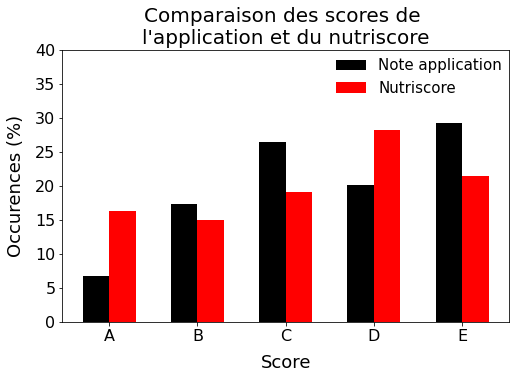

In [70]:
tot = val_nutri.shape[0]
y_A_note = len(val_nutri.loc[(val_nutri["Note_L"]=="A") ,"Sucre_portion"].values.tolist())*100/tot
y_B_note = len(val_nutri.loc[(val_nutri["Note_L"]=="B") ,"Sucre_portion"].values.tolist())*100/tot
y_C_note = len(val_nutri.loc[(val_nutri["Note_L"]=="C") ,"Sucre_portion"].values.tolist())*100/tot
y_D_note = len(val_nutri.loc[(val_nutri["Note_L"]=="D") ,"Sucre_portion"].values.tolist())*100/tot
y_E_note = len(val_nutri.loc[(val_nutri["Note_L"]=="E") ,"Sucre_portion"].values.tolist())*100/tot
bar_note = [y_A_note,y_B_note,y_C_note,y_D_note,y_E_note]

y_A_nutri = len(val_nutri.loc[(val_nutri["Nutriscore_Lettres_C"]=="A") ,"Sucre_portion"].values.tolist())*100/tot
y_B_nutri = len(val_nutri.loc[(val_nutri["Nutriscore_Lettres_C"]=="B") ,"Sucre_portion"].values.tolist())*100/tot
y_C_nutri = len(val_nutri.loc[(val_nutri["Nutriscore_Lettres_C"]=="C") ,"Sucre_portion"].values.tolist())*100/tot
y_D_nutri = len(val_nutri.loc[(val_nutri["Nutriscore_Lettres_C"]=="D") ,"Sucre_portion"].values.tolist())*100/tot
y_E_nutri = len(val_nutri.loc[(val_nutri["Nutriscore_Lettres_C"]=="E") ,"Sucre_portion"].values.tolist())*100/tot

bar_nutri = [y_A_nutri,y_B_nutri,y_C_nutri,y_D_nutri,y_E_nutri]
lettre = ["A","B","C","D","E"]

r1 = np.arange(len(bar_note))
r2 = [x + 0.3 for x in r1]

plt.figure(figsize=(8,5))
plt.bar(r1, bar_note, width = 0.3, color = 'black', capsize=7, label="Note application")
plt.bar(r2, bar_nutri, width = 0.3, color = 'red',  capsize=7, label="Nutriscore")

plt.xticks([r + 0.15 for r in range(len(bar_nutri))], lettre, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Score", fontsize=18, labelpad=10)
plt.ylabel("Occurences (%)", fontsize=18, labelpad=10)
plt.title("Comparaison des scores de \nl'application et du nutriscore", fontsize=20)
leg = plt.legend(bbox_to_anchor=(1.015, 1.02),frameon=True,fontsize=15)
leg.get_frame().set_edgecolor("white")
leg.get_frame().set_linewidth(1.0)

plt.ylim(0,40)
plt.show()

<a class="anchor" id="section_1_3"></a>
## Analyse univariée

Nous venons d'établir un classement selon la note (A, B, C, D et E). Nous allons voir quelles sont les variables qui influent le plus sur les notes et nous allons regarder s'il y a des tendances qui se dégagent selon les catégories de produit.

<a class="anchor" id="section_1_3_1"></a>
### ANOVA 

Nous définissons d'abord quelques fonctions de tendance centrale (médiane et moyenne)

In [71]:
def outlier_nbr(y):
    # finding the 1st quartile
    q1 = np.quantile(y, 0.25)
    # finding the 3rd quartile
    q3 = np.quantile(y, 0.75)
    med = np.median(y)
    # finding the iqr region
    iqr = q3-q1
    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    A = np.array(y)
    outliers = A[(A <= lower_bound) | (A >= upper_bound)]

    return ((outliers))

def median(l):
    half = len(l) // 2
    l.sort()
    if not len(l) % 2:
        return (l[half - 1] + l[half]) / 2.0
    return l[half]


def moyenne(l):
    return sum(l)/len(l)
    
def box_value(y):
    # finding the 1st quartile
    if len(y)==0:
        return [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
    else:
        q1 = np.quantile(y, 0.25)
        # finding the 3rd quartile
        q3 = np.quantile(y, 0.75)
        med = np.median(y)
        # finding the iqr region
        iqr = q3-q1
        # finding upper and lower whiskers
        upper_bound = q3+(1.5*iqr)
        lower_bound = q1-(1.5*iqr)
        if lower_bound>=0:
            return [lower_bound, q1, med, q3, iqr, upper_bound]
        else:
            lower_bound==0
            return [0, q1, med, q3, iqr, upper_bound]

Nous allons maintenant traçer la distribution du sucre pour chaque note donnée.

Les médianes calculées sont: [0.0, 8.24, 6.2, 1.7, 2.1]
Les moyennes calculées sont: [0.35, 7.29, 7.34, 5.26, 8.0]
Les écarts_types calculées sont: [1.54, 5.64, 6.33, 7.12, 22.89]


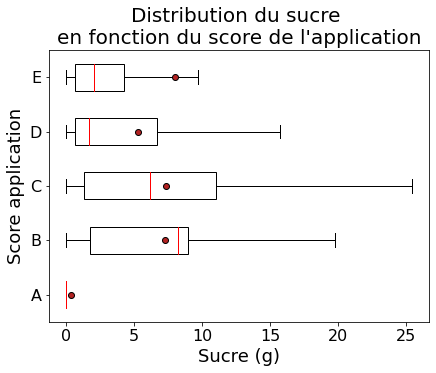

In [72]:
y_A = val_nutri.loc[(val_nutri["Note_L"]=="A") ,"Sucre_portion"].values.tolist()
y_B = val_nutri.loc[(val_nutri["Note_L"]=="B") ,"Sucre_portion"].values.tolist()
y_C = val_nutri.loc[(val_nutri["Note_L"]=="C") ,"Sucre_portion"].values.tolist()
y_D = val_nutri.loc[(val_nutri["Note_L"]=="D") ,"Sucre_portion"].values.tolist()
y_E = val_nutri.loc[(val_nutri["Note_L"]=="E") ,"Sucre_portion"].values.tolist()

med_nutri = [median(y_A), median(y_B), median(y_C), median(y_D), median(y_E)]
moy_nutri = [round(moyenne(y_A),2),round(moyenne(y_B),2), round(moyenne(y_C),2),round(moyenne(y_D),2),
                 round(moyenne(y_E),2)]
std_nutri = [round(np.std(y_A),2), round(np.std(y_B),2), round(np.std(y_C),2), round(np.std(y_D),2), 
                 round(np.std(y_E),2)]

print("Les médianes calculées sont:",med_nutri)
print("Les moyennes calculées sont:",moy_nutri)
print("Les écarts_types calculées sont:",std_nutri)

note_appli = pd.DataFrame({'A': pd.Series(y_A), 'B': pd.Series(y_B), 'C': pd.Series(y_C), 
                               'D': pd.Series(y_D), 'E': pd.Series(y_E)})

plt.figure(figsize=[15,5])
plt.subplot(121)
boxplot = note_appli.boxplot(column=["A", "B", "C", "D", "E"], vert=False, showfliers=False, grid = False, 
                                 patch_artist=True, boxprops=dict(facecolor="white", color="black"),
                                 whiskerprops=dict(color="black"),medianprops=dict(color="red"),
                                 showmeans=True, meanprops = {'marker':'o', 'markeredgecolor':'black',
                                                              'markerfacecolor':'firebrick'})
plt.yticks([1,2,3,4,5], ["A", "B", "C", "D", "E"], fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("Sucre (g)", fontsize=18)
plt.ylabel("Score application", fontsize=18)
plt.title("Distribution du sucre \nen fonction du score de l'application", fontsize=20)
plt.show()


<a class="anchor" id="section_1_3_2"></a>
### Calcul de eta² et des p-values
Nous pouvos voir que les variances et les distributions ne sont pas les mêmes selon la note du produit. Afin de quantifier cela, nous faisons une ANOVA et nous calculons l'éta² qui rend compte de la différence de variance selon une variable qualitative. Nous calculons aussi la p-value pour tester s'il y a une réelle différence de variance entre les catégories.

In [73]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    if SCT!=0:
        return SCE/SCT
    else:
        return np.nan

from scipy.stats import f_oneway

eta = eta_squared(val_nutri["Note_L"], val_nutri["Sucre_portion"])
display(eta)

y_A = val_nutri.loc[val_nutri["Note_L"]=="A","Sucre_portion"]
y_B = val_nutri.loc[val_nutri["Note_L"]=="B","Sucre_portion"]
y_C = val_nutri.loc[val_nutri["Note_L"]=="C","Sucre_portion"]
y_D = val_nutri.loc[val_nutri["Note_L"]=="D","Sucre_portion"]
y_E = val_nutri.loc[val_nutri["Note_L"]=="E","Sucre_portion"]
display(f_oneway(y_A, y_B, y_C, y_D, y_E))

0.020639851091474898

F_onewayResult(statistic=284.52604481998515, pvalue=1.5095508564745152e-242)

Nous trouvons une valeur d'éta² de 0.02 et une p-value inférieur à 0.05. Cela indique qu'il n'y a pas de corrélation entre le sucre et les notes. Nous faisons le même calcul pour les autres variables (glucide, energie, sodium, acide gras saturés, fibre et protéine)

In [74]:
eta_glu = eta_squared(val_nutri["Note_L"], val_nutri["Glucide_portion"])
eta_ene = eta_squared(val_nutri["Note_L"], val_nutri["Energie_portion"])
eta_ags = eta_squared(val_nutri["Note_L"], val_nutri["A_G_Saturés_portion"])
eta_sod = eta_squared(val_nutri["Note_L"], val_nutri["Sodium_portion"])
eta_fib = eta_squared(val_nutri["Note_L"], val_nutri["Fibre_portion"])
eta_pro = eta_squared(val_nutri["Note_L"], val_nutri["Protéine_portion"])

display(f"Pour le glucide, eta² vaut {round(eta_glu,3)}")
display(f"Pour l'énergie, eta² vaut {round(eta_ene,3)}")
display(f"Pour les acides gras saturés, eta² vaut {round(eta_ags,3)}")
display(f"Pour le sodium, eta² vaut {round(eta_sod,3)}")
display(f"Pour les fibres, eta² vaut {round(eta_fib,3)}")
display(f"Pour les protéines, eta² vaut {round(eta_pro,3)}")

list_port = ["Glucide_portion","Energie_portion","A_G_Saturés_portion","Sodium_portion","Fibre_portion","Protéine_portion"]
for col in list_port:
    y_A = []
    y_B = []
    y_C = []
    y_D = []
    y_E = []
    y_A = val_nutri.loc[val_nutri["Note_L"]=="A",col]
    y_B = val_nutri.loc[val_nutri["Note_L"]=="B",col]
    y_C = val_nutri.loc[val_nutri["Note_L"]=="C",col]
    y_D = val_nutri.loc[val_nutri["Note_L"]=="D",col]
    y_E = val_nutri.loc[val_nutri["Note_L"]=="E",col]
    display(f_oneway(y_A, y_B, y_C, y_D, y_E))

'Pour le glucide, eta² vaut 0.18'

"Pour l'énergie, eta² vaut 0.438"

'Pour les acides gras saturés, eta² vaut 0.057'

'Pour le sodium, eta² vaut 0.142'

'Pour les fibres, eta² vaut 0.2'

'Pour les protéines, eta² vaut 0.469'

F_onewayResult(statistic=2970.8190473130803, pvalue=0.0)

F_onewayResult(statistic=10517.14471506731, pvalue=0.0)

F_onewayResult(statistic=823.4495734386834, pvalue=0.0)

F_onewayResult(statistic=2243.299343969468, pvalue=0.0)

F_onewayResult(statistic=3374.787158159672, pvalue=0.0)

F_onewayResult(statistic=11917.966578078436, pvalue=0.0)

In [75]:
#eta_sucre = eta_squared(val_nutri["Val_neg"], val_nutri["Sucre_portion"])
#eta_glu = eta_squared(val_nutri["Val_neg"], val_nutri["Glucide_portion"])
#eta_ene = eta_squared(val_nutri["Val_neg"], val_nutri["Energie_portion"])
#eta_ags = eta_squared(val_nutri["Val_neg"], val_nutri["A_G_Saturés_portion"])
#eta_sod = eta_squared(val_nutri["Val_neg"], val_nutri["Sodium_portion"])
#display(eta_sucre,eta_glu,eta_ene,eta_ags,eta_sod)

Comme pour le sucre, la p-value est inférieure à 0.05 % pour l'ensemble des variables considérés.
Il n'y a pas non plus une forte corrélation entre l'une des variables et la note donnée.

<a class="anchor" id="chapter2"></a>
# Chapitre 2 : Etude bivariée

<a class="anchor" id="section_2_1"></a>
## Matrice de corrélation                 

Nous regardons maintenant, la matrice de corrélation pour voir s'il y a des corrélations linéaires entre chaque variable. 
Cela permettra de confirmer ou non qu'il n'y a pas de corrélation claires entre deux variables du dataframe.

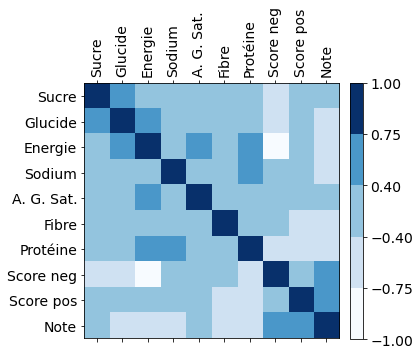

,Sucre_p,Glucide_p,Energie_p,Sodium_p,A_G_Saturés_p,Fibre_p,Protéine_p,Val_neg,Val_pos,Note
Sucre_p,1.00,0.58,0.29,-0.08,-0.03,0.04,-0.16,-0.43,0.19,-0.30
Glucide_p,0.58,1.00,0.70,0.02,-0.02,0.34,0.06,-0.60,-0.16,-0.47
Energie_p,0.29,0.70,1.00,0.26,0.45,0.38,0.50,-0.80,-0.39,-0.71
Sodium_p,-0.08,0.02,0.26,1.00,0.20,0.05,0.41,-0.37,-0.27,-0.41
A_G_Saturés_p,-0.03,-0.02,0.45,0.20,1.00,-0.01,0.30,-0.38,-0.09,-0.27
Fibre_p,0.04,0.34,0.38,0.05,-0.01,1.00,0.19,-0.26,-0.52,-0.44
Protéine_p,-0.16,0.06,0.50,0.41,0.30,0.19,1.00,-0.46,-0.63,-0.56
Val_neg,-0.43,-0.60,-0.80,-0.37,-0.38,-0.26,-0.46,1.00,0.30,0.74
Val_pos,0.19,-0.16,-0.39,-0.27,-0.09,-0.52,-0.63,0.30,1.00,0.63
Note,-0.30,-0.47,-0.71,-0.41,-0.27,-0.44,-0.56,0.74,0.63,1.00


In [76]:
val_analyse = val_nutri[["pnns_groups_1","pnns_groups_2","Sucre","Glucide","Energie","Sodium","A_G_Saturés","Fibre","Protéine",
                        "Sucre_portion","Glucide_portion","Energie_portion","Sodium_portion","A_G_Saturés_portion",
                         "Fibre_portion","Protéine_portion","Val_neg","Val_pos","Note","Note_L"]].copy()

val_analyse.rename(columns = {'Sucre_portion': 'Sucre_p', 'Glucide_portion': 'Glucide_p', 'Energie_portion': 'Energie_p',
                            'Sodium_portion': 'Sodium_p','A_G_Saturés_portion': 'A_G_Saturés_p', 'Fibre_portion': 'Fibre_p',
                            "Protéine_portion" : "Protéine_p"},inplace=True)

#display(val_analyse.info())
matrix = val_analyse.iloc[:,9:-1].corr()
col = ["Sucre","Glucide","Energie","Sodium","A. G. Sat.","Fibre","Protéine","Score neg","Score pos","Note"]

plt.figure(figsize=[5,5])
cmap=plt.cm.get_cmap('Blues', 6)
boundaries = [-1, -0.75, -0.4, 0.4, 0.75,  1]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
plt.matshow(matrix,cmap=cmap, fignum=1, norm=norm)
plt.xticks(range(len(col)), col, fontsize=14, rotation=90)
plt.yticks(range(len(col)), col, fontsize=14)
plt.colorbar(fraction=0.046, pad=0.04).ax.tick_params(labelsize=14)
plt.show()
display(matrix.round(2))

Nous pouvons voir qu'il y a des petites corrélations linéaires entre différentes variables :
- sucre et glucide
- sucre et score négatif
- glucide et énergie
- glucide et score négatif
- glucide et note
- energie et acide gras saturés
- énergie et protéine
- énergie et score négatif
- énergie et note
- sodium et protéine
- fibre et score positif
- fibre et note
- protéine et score positif
- protéine et note
- score négatif et note
- score positif et note
                
       
Nous allons tracer les variables concernés liés aux sucres, puis à l'énergie, aux protéines et aux notes afin d'évaluer une possible corrélation entre variables. De plus, nous calculerons aussi le coefficient de régression linéaire (R²).
<a class="anchor" id="section_2_2"></a>
## Score négatif
<a class="anchor" id="section_2_2_1"></a>
### Sucre et glucide

L'équation de régression linéaire s'écrit 0.92x + 10. Le coefficient R² vaut 0.333


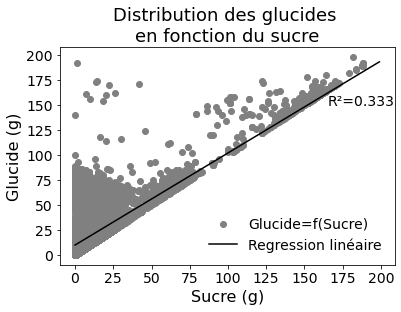

In [77]:
import statsmodels.api as sm

Y = val_analyse['Glucide_p']
X = val_analyse[['Sucre_p']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Sucre_p'],result.params['intercept']
r_2= (st.pearsonr(val_analyse["Sucre_p"],val_analyse["Glucide_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1 =[]
var_2 =[]
pear = []
reg_lin = []
var_1 = ["Sucre_p"]
var_2 = ["Glucide_p"]
pear = [(st.pearsonr(val_analyse["Sucre_p"],val_analyse["Glucide_p"])[0])]
reg_lin = [r_2]

plt.scatter(x=val_analyse["Sucre_p"], y=val_analyse["Glucide_p"], color = "gray",label="Glucide=f(Sucre)")
plt.plot(np.arange(200),[a*x+b for x in np.arange(200)], color="black", label="Regression linéaire")
plt.title("Distribution des glucides \nen fonction du sucre", fontsize=18)
plt.xlabel("Sucre (g)", fontsize=16)
plt.ylabel("Glucide (g)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14).get_frame().set_edgecolor("white")
plt.text(165,150, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.show()

<a class="anchor" id="section_2_2_2"></a>
### Sucre et score négatif

L'équation de régression linéaire s'écrit -3.26x + 64. Le coefficient R² vaut 0.188


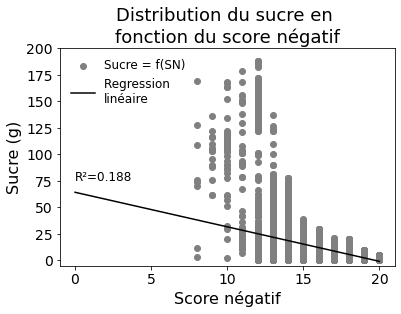

In [78]:
Y = val_analyse['Sucre_p']
X = val_analyse[['Val_neg']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Val_neg'],result.params['intercept']
r_2= (st.pearsonr(val_analyse["Val_neg"],val_analyse["Sucre_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Val_neg")
var_2.append("Sucre_p")
pear.append((st.pearsonr(val_analyse["Val_neg"],val_analyse["Sucre_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_analyse["Val_neg"], y=val_analyse["Sucre_p"], label="Sucre = f(SN)", color="gray")
plt.plot(np.arange(21),[a*x+b for x in np.arange(21)], color="black", label="Regression \nlinéaire")
plt.xlabel("Score négatif", fontsize=16)
plt.ylabel("Sucre (g)", fontsize=16)
plt.xticks([0,5,10,15,20],fontsize=14)
plt.yticks([0,25,50,75,100,125,150,175,200],fontsize=14)
plt.ylim(-5,200)
plt.legend(fontsize=12, frameon=False, loc=2)
plt.title("Distribution du sucre en \nfonction du score négatif", fontsize=18)
plt.text(0,75, f"R²={round(r_2,3)}", color ="black", fontsize=12)
plt.show()

<a class="anchor" id="section_2_2_3"></a>
### Glucide et score négatif

L'équation de régression linéaire s'écrit -7.18x + 143. Le coefficient R² vaut 0.357


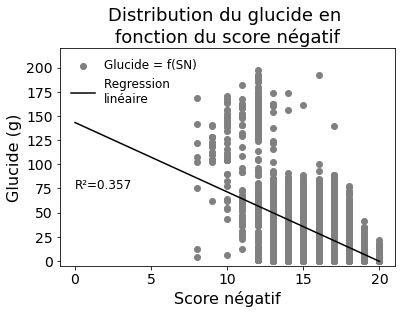

In [79]:
Y = val_analyse['Glucide_p']
X = val_analyse[['Val_neg']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Val_neg'],result.params['intercept']
r_2= (st.pearsonr(val_analyse["Val_neg"],val_analyse["Glucide_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Val_neg")
var_2.append("Glucide_p")
pear.append((st.pearsonr(val_analyse["Val_neg"],val_analyse["Glucide_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_analyse["Val_neg"], y=val_analyse["Glucide_p"],color="gray", label="Glucide = f(SN)")
plt.plot(np.arange(21),[a*x+b for x in np.arange(21)], color="black", label="Regression \nlinéaire")
plt.xlabel("Score négatif", fontsize = 16)
plt.ylabel("Glucide (g)", fontsize = 16)
plt.xticks([0,5,10,15,20],fontsize=14)
plt.yticks([0,25,50,75,100,125,150,175,200],fontsize=14)
plt.ylim(-5,220)
plt.legend(fontsize=12, frameon=False, loc=2)
plt.title("Distribution du glucide en \nfonction du score négatif", fontsize=18)
plt.text(0,75, f"R²={round(r_2,3)}", color ="black", fontsize=12)
plt.show()

<a class="anchor" id="section_2_2_4"></a>
### Energie et glucide

L'équation de régression linéaire s'écrit 17.99x + 323. Le coefficient R² vaut 0.496


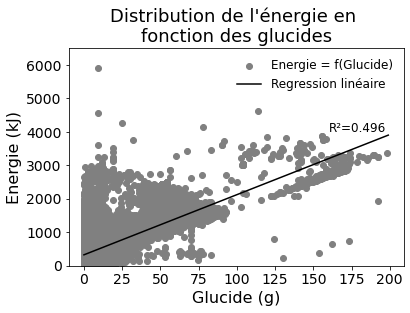

In [80]:
Y = val_analyse['Energie_p']
X = val_analyse[['Glucide_p']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Glucide_p'],result.params['intercept']
r_2 = (st.pearsonr(val_analyse["Glucide_p"],val_analyse["Energie_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Glucide_p")
var_2.append("Energie_p")
pear.append((st.pearsonr(val_analyse["Glucide_p"],val_analyse["Energie_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_analyse["Glucide_p"], y=val_analyse["Energie_p"], color="gray", label="Energie = f(Glucide)")
plt.plot(np.arange(200),[a*x+b for x in np.arange(200)], color="black", label="Regression linéaire")
plt.xlabel("Glucide (g)", fontsize = 16)
plt.ylabel("Energie (kJ)", fontsize = 16)
plt.xticks([0,25,50,75,100,125,150,175,200],fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-5,6500)
plt.legend(fontsize=12, frameon=False, loc=0)
plt.title("Distribution de l'énergie en \nfonction des glucides", fontsize=18)
plt.text(160,4000, f"R²={round(r_2,3)}", color ="black", fontsize=12)
plt.show()

<a class="anchor" id="section_2_2_5"></a>
### Energie et acide gras saturés 

L'équation de régression linéaire s'écrit 70.92x + 454. Le coefficient R² vaut 0.2


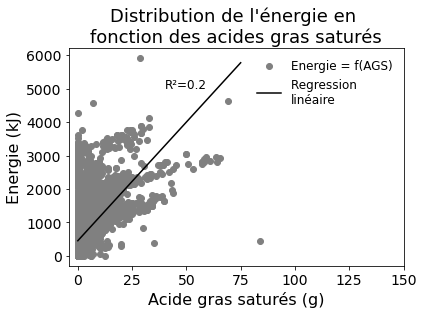

In [81]:
Y = val_analyse['Energie_p']
X = val_analyse[['A_G_Saturés_p']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['A_G_Saturés_p'],result.params['intercept']
r_2= (st.pearsonr(val_analyse["A_G_Saturés_p"],val_analyse["Energie_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("A_G_Saturés_p")
var_2.append("Energie_p")
pear.append((st.pearsonr(val_analyse["A_G_Saturés_p"],val_analyse["Energie_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_analyse["A_G_Saturés_p"], y=val_analyse["Energie_p"], color="gray", label="Energie = f(AGS)")
plt.plot(np.arange(76),[a*x+b for x in np.arange(76)], color="black", label="Regression \nlinéaire")
plt.xlabel("Acide gras saturés (g)", fontsize = 16)
plt.ylabel("Energie (kJ)", fontsize = 16)
plt.xticks([0,25,50,75,100,125,150],fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(-5,6500)
plt.legend(fontsize=12, frameon=False, loc=0)
plt.title("Distribution de l'énergie en \nfonction des acides gras saturés", fontsize=18)
plt.text(40,5000, f"R²={round(r_2,3)}", color ="black", fontsize=12)
plt.show()

<a class="anchor" id="section_2_2_6"></a>
### Energie et score négatif

L'équation de régression linéaire s'écrit -245.75x + 4966. Le coefficient R² vaut 0.64


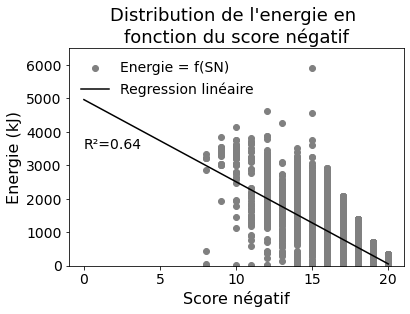

In [82]:
Y = val_analyse['Energie_p']
X = val_analyse[['Val_neg']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Val_neg'],result.params['intercept']
r_2= (st.pearsonr(val_analyse["Val_neg"],val_analyse["Energie_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Val_neg")
var_2.append("Energie_p")
pear.append((st.pearsonr(val_analyse["Val_neg"],val_analyse["Energie_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_analyse["Val_neg"], y=val_analyse["Energie_p"], label="Energie = f(SN)", color="gray")
plt.plot(np.arange(21),[a*x+b for x in np.arange(21)], color="black", label= "Regression linéaire")
plt.xlabel("Score négatif",fontsize=16)
plt.ylabel("Energie (kJ)", fontsize=16)
plt.xticks([0,5,10,15,20],fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-5,6500)
plt.legend(fontsize=14, frameon=False, loc=2)
plt.title("Distribution de l'energie en \nfonction du score négatif", fontsize=18)
plt.text(0,3500, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.show()

<a class="anchor" id="section_2_3"></a>
## Score positif
<a class="anchor" id="section_2_3_1"></a>
### Fibre et score positif

L'équation de régression linéaire s'écrit -0.42x + 7. Le coefficient R² vaut 0.274


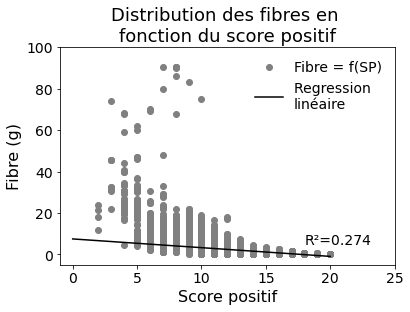

In [83]:
Y = val_analyse['Fibre_p']
X = val_analyse[['Val_pos']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Val_pos'],result.params['intercept']
r_2= (st.pearsonr(val_analyse["Val_pos"],val_analyse["Fibre_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Val_pos")
var_2.append("Fibre_p")
pear.append((st.pearsonr(val_analyse["Val_pos"],val_analyse["Fibre_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_analyse["Val_pos"], y=val_analyse["Fibre_p"], color="gray", label="Fibre = f(SP)")
plt.plot(np.arange(21),[a*x+b for x in np.arange(21)], color="black", label="Regression \nlinéaire")
plt.xlabel("Score positif", fontsize=16)
plt.ylabel("Fibre (g)", fontsize=16)
plt.xticks([0,5,10,15,20,25],fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-5,100)
plt.legend(fontsize=14, frameon=False, loc=0)
plt.title("Distribution des fibres en \nfonction du score positif", fontsize=18)
plt.text(18,5, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.show()

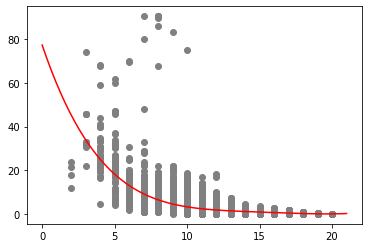

0.4711025647626007


In [84]:
from sklearn.metrics import r2_score
x = val_analyse['Val_pos']
y = val_analyse['Fibre_p']
p4 = np.poly1d(np.polyfit(x, y, 5))
#print p4
xp = np.linspace(0, 21, 200)
plt.scatter(x=val_analyse["Val_pos"], y=val_analyse["Fibre_p"], color="gray", label="Fibre = f(SP)")
plt.plot(xp, p4(xp), c='r')
plt.show()
print(r2_score(y, p4(x)))

C:\Users\farid\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


90.09561889465937 0.3280332973735138 0.024697425640115567


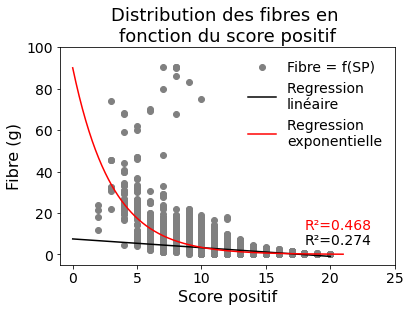

In [85]:
from scipy.optimize import curve_fit
import sympy as sym
x = val_analyse['Val_pos']
y = val_analyse['Fibre_p']

def func(x, a, b, c):
    return a*np.exp(-b*x) + c

x_f = np.linspace(0, 21, 500)
x_f = np.array(x_f, dtype=float)
popt, pcov = curve_fit(func, x, y)

print (popt[0], popt[1], popt[2])
reg_exp = (r2_score(y, [popt[0]*np.exp(-popt[1]*z) + popt[2] for z in x]))
plt.title(f"{round(popt[0],2)}*exp({round(popt[1],2)}*x) + {round(popt[2],2)} ",fontsize=16)
plt.scatter(x=val_analyse["Val_pos"], y=val_analyse["Fibre_p"], color="gray", label="Fibre = f(SP)")
plt.plot(np.arange(21),[a*x+b for x in np.arange(21)], color="black", label="Regression \nlinéaire")
plt.plot(x_f, func(x_f, *popt), label="Regression \nexponentielle", color="red")
plt.xlabel("Score positif", fontsize=16)
plt.ylabel("Fibre (g)", fontsize=16)
plt.xticks([0,5,10,15,20,25],fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-1,25)
plt.ylim(-5,100)
plt.legend(fontsize=14, frameon=False, loc=1)
plt.title("Distribution des fibres en \nfonction du score positif", fontsize=18)
plt.text(18,5, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.text(18,12, f"R²={round(reg_exp,3)}", color ="red", fontsize=14)
plt.show()

C:\Users\farid\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


96.8918456545651 0.3525039778383301


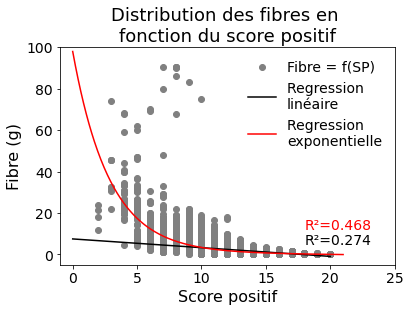

In [86]:
x = val_analyse['Val_pos']
y = val_analyse['Fibre_p']

def func(x, a, b, c,d):
    return a*np.exp(-b*x) + c*x + d

x_f = np.linspace(0, 21, 500)
x_f = np.array(x_f, dtype=float)
popt, pcov = curve_fit(func, x, y)

print (popt[0], popt[1])
reg_exp = (r2_score(y, [popt[0]*np.exp(-popt[1]*z) + popt[2]*z + popt[3] for z in x]))
#plt.title(f"{round(popt[0],2)}*exp({round(popt[1],2)}*x) + {round(popt[2],2)} ",fontsize=16)
plt.scatter(x=val_analyse["Val_pos"], y=val_analyse["Fibre_p"], color="gray", label="Fibre = f(SP)")
plt.plot(np.arange(21),[a*x+b for x in np.arange(21)], color="black", label="Regression \nlinéaire")
plt.plot(x_f, func(x_f, *popt), label="Regression \nexponentielle", color="red")
plt.xlabel("Score positif", fontsize=16)
plt.ylabel("Fibre (g)", fontsize=16)
plt.xticks([0,5,10,15,20,25],fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-1,25)
plt.ylim(-5,100)
plt.legend(fontsize=14, frameon=False, loc=1)
plt.title("Distribution des fibres en \nfonction du score positif", fontsize=18)
plt.text(18,5, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.text(18,12, f"R²={round(reg_exp,3)}", color ="red", fontsize=14)
plt.show()

In [87]:
print(r2_score(y, [popt[0]*np.exp(-popt[1] * z) + popt[2] for z in x]))

0.44826568932573496


<a class="anchor" id="section_2_3_2"></a>
### Protéine et score positif

L'équation de régression linéaire s'écrit -1.33x + 25. Le coefficient R² vaut 0.392


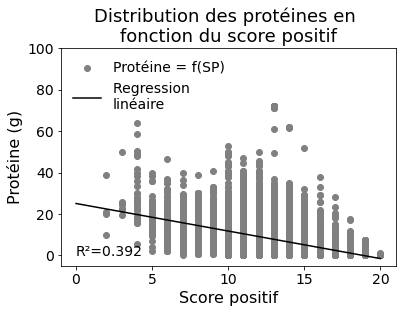

In [88]:
Y = val_analyse['Protéine_p']
X = val_analyse[['Val_pos']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Val_pos'],result.params['intercept']
r_2= (st.pearsonr(val_analyse["Val_pos"],val_analyse["Protéine_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Val_pos")
var_2.append("Protéine_p")
pear.append((st.pearsonr(val_analyse["Val_pos"],val_analyse["Protéine_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_analyse["Val_pos"], y=val_analyse["Protéine_p"], color="gray", label="Protéine = f(SP)")
plt.plot(np.arange(21),[a*x+b for x in np.arange(21)], color="black", label="Regression \nlinéaire")
plt.xlabel("Score positif", fontsize = 16)
plt.ylabel("Protéine (g)", fontsize = 16)
plt.xticks([0,5,10,15,20],fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-5,100)
plt.legend(fontsize=14, frameon=False, loc=0)
plt.title("Distribution des protéines en \nfonction du score positif", fontsize=18)
plt.text(0,0, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.show()

<a class="anchor" id="section_2_3_3"></a>
### Protéine et energie

L'équation de régression linéaire s'écrit 40.52x + 384. Le coefficient R² vaut 0.253


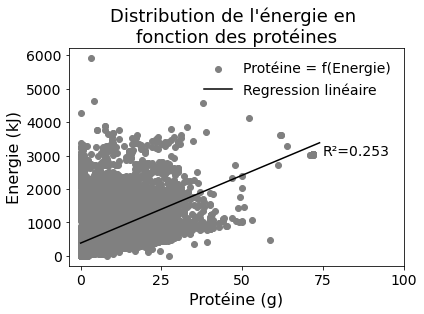

In [89]:
Y = val_analyse['Energie_p']
X = val_analyse[['Protéine_p']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Protéine_p'],result.params['intercept']
r_2= (st.pearsonr(val_analyse["Protéine_p"],val_analyse["Energie_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Protéine_p")
var_2.append("Energie_p")
pear.append((st.pearsonr(val_analyse["Protéine_p"],val_analyse["Energie_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_analyse["Protéine_p"], y=val_analyse["Energie_p"], color="gray", label="Protéine = f(Energie)")
plt.plot(np.arange(75),[a*x+b for x in np.arange(75)], color="black", label="Regression linéaire")
plt.xlabel("Protéine (g)", fontsize = 16)
plt.ylabel("Energie (kJ)", fontsize = 16)
plt.xticks([0,25,50,75,100],fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(-5,100)
plt.legend(fontsize=14, frameon=False, loc=0)
plt.title("Distribution de l'énergie en \nfonction des protéines", fontsize=18)
plt.text(75,3000, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.show()

<a class="anchor" id="section_2_3_4"></a>
### Protéine et sodium

L'équation de régression linéaire s'écrit 0.03x + 0. Le coefficient R² vaut 0.168


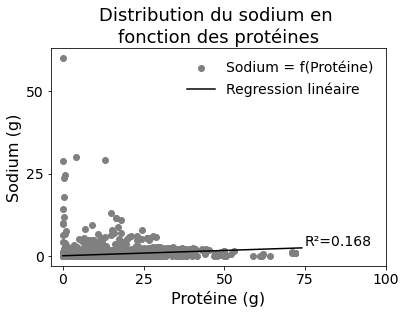

In [90]:
Y = val_analyse['Sodium_p']
X = val_analyse[['Protéine_p']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Protéine_p'],result.params['intercept']
r_2= (st.pearsonr(val_analyse["Protéine_p"],val_analyse["Sodium_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Protéine_p")
var_2.append("Sodium_p")
pear.append((st.pearsonr(val_analyse["Protéine_p"],val_analyse["Sodium_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_analyse["Protéine_p"], y=val_analyse["Sodium_p"], color="gray", label="Sodium = f(Protéine)")
plt.plot(np.arange(75),[a*x+b for x in np.arange(75)], color="black", label="Regression linéaire")
plt.xlabel("Protéine (g)", fontsize = 16)
plt.ylabel("Sodium (g)", fontsize = 16)
plt.xticks([0,25,50,75,100],fontsize=14)
plt.yticks([0,25,50], fontsize=14)
#plt.ylim(-5,100)
plt.legend(fontsize=14, frameon=False, loc=0)
plt.title("Distribution du sodium en \nfonction des protéines", fontsize=18)
plt.text(75,3, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.show()

<a class="anchor" id="section_2_3_5"></a>
### Protéine et score négatif

L'équation de régression linéaire s'écrit -1.77x + 37. Le coefficient R² vaut 0.215


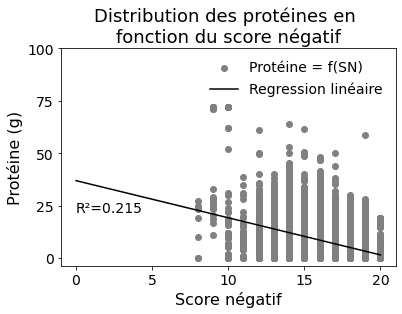

In [91]:
Y = val_analyse['Protéine_p']
X = val_analyse[['Val_neg']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Val_neg'],result.params['intercept']
r_2= (st.pearsonr(val_analyse["Val_neg"],val_analyse["Protéine_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Val_neg")
var_2.append("Protéine_p")
pear.append((st.pearsonr(val_analyse["Val_neg"],val_analyse["Protéine_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_analyse["Val_neg"], y=val_analyse["Protéine_p"], color="gray", label="Protéine = f(SN)")
plt.plot(np.arange(21),[a*x+b for x in np.arange(21)], color="black", label="Regression linéaire")
plt.xlabel("Score négatif", fontsize = 16)
plt.ylabel("Protéine (g)", fontsize = 16)
plt.xticks([0,5,10,15,20],fontsize=14)
plt.yticks([0,25,50,75,100], fontsize=14)
#plt.ylim(-5,100)
plt.legend(fontsize=14, frameon=False, loc=0)
plt.title("Distribution des protéines en \nfonction du score négatif", fontsize=18)
plt.text(0,22, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.show()

<a class="anchor" id="section_2_4"></a>
## Note
<a class="anchor" id="section_2_4_1"></a>
### Note et glucide

L'équation de régression linéaire s'écrit -12.34x + 51. Le coefficient R² vaut 0.22


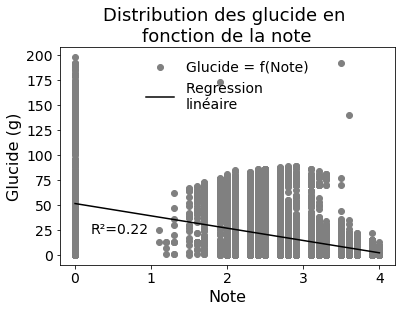

In [92]:
Y = val_analyse['Glucide_p']
X = val_analyse[['Note']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Note'],result.params['intercept']
r_2= (st.pearsonr(val_analyse["Note"],val_analyse["Glucide_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Note")
var_2.append("Glucide_p")
pear.append((st.pearsonr(val_analyse["Note"],val_analyse["Glucide_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_analyse["Note"], y=val_analyse["Glucide_p"], color="gray", label="Glucide = f(Note)")
plt.plot(np.arange(5),[a*x+b for x in np.arange(5)], color="black", label="Regression \nlinéaire")
plt.xlabel("Note", fontsize = 16)
plt.ylabel("Glucide (g)", fontsize = 16)
plt.xticks([0,1,2,3,4],fontsize=14)
plt.yticks([0,25,50,75,100,125,150,175,200], fontsize=14)
#plt.ylim(-5,100)
plt.legend(fontsize=14, frameon=False, loc=0)
plt.title("Distribution des glucide en \nfonction de la note", fontsize=18)
plt.text(0.2,22, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.show()

Pour une note de 0, il y a beaucoup de valeurs en glucide distribués entre 0 et 200. En revanche, lorsque la note est supérieure à 0, alors la quantité de glucide ne dépasse pas 30. Nous étudions alors l'évolution du glucide en fonction de la note en excluant les notes nulles.

L'équation de régression linéaire s'écrit -13.62x + 55. Le coefficient R² vaut 0.165


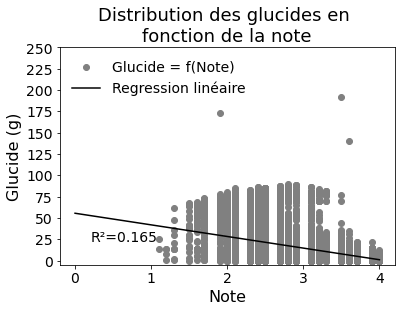

In [93]:
val_reg = val_analyse.loc[val_analyse["Note"]>0,:]

Y = val_reg['Glucide_p']
X = val_reg[["Note"]]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Note'],result.params['intercept']
r_2= (st.pearsonr(val_reg["Note"],val_reg["Glucide_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Note_non_nulle")
var_2.append("Glucide_p")
pear.append((st.pearsonr(val_reg["Note"],val_reg["Glucide_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_reg["Note"], y=val_reg["Glucide_p"], color="gray", label="Glucide = f(Note)")
plt.plot(np.arange(5),[a*x+b for x in np.arange(5)], color="black", label="Regression linéaire")
plt.xlabel("Note", fontsize = 16)
plt.ylabel("Glucide (g)", fontsize = 16)
plt.xticks([0,1,2,3,4],fontsize=14)
plt.yticks([0,25,50,75,100,125,150,175,200,225,250], fontsize=14)
plt.ylim(-5,250)
plt.legend(fontsize=14, frameon=False, loc=0)
plt.title("Distribution des glucides en \nfonction de la note", fontsize=18)
plt.text(0.2,22, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.show()

<a class="anchor" id="section_2_4_2"></a>
### Note et énergie

L'équation de régression linéaire s'écrit -474.34x + 1975. Le coefficient R² vaut 0.498


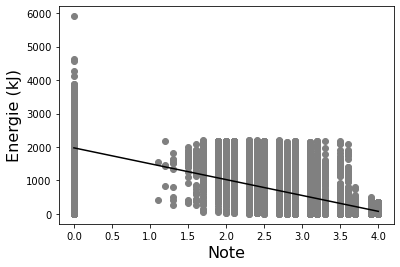

In [94]:
Y = val_analyse['Energie_p']
X = val_analyse[['Note']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Note'],result.params['intercept']
r_2= (st.pearsonr(val_analyse["Note"],val_analyse["Energie_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Note")
var_2.append("Energie_p")
pear.append((st.pearsonr(val_analyse["Note"],val_analyse["Energie_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_analyse["Note"], y=val_analyse["Energie_p"], color="gray", label="Energie = f(Note)")
plt.plot(np.arange(5),[a*x+b for x in np.arange(5)], color="black", label="Regression \nlinéaire")
plt.xlabel("Note", fontsize = 16)
plt.ylabel("Energie (kJ)", fontsize = 16)
plt.show()

L'équation de régression linéaire s'écrit -584.54x + 2317. Le coefficient R² vaut 0.442


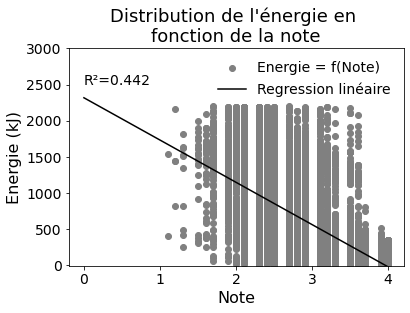

In [95]:
Y = val_reg['Energie_p']
X = val_reg[["Note"]]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Note'],result.params['intercept']
r_2= (st.pearsonr(val_reg["Note"],val_reg["Energie_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Note_non_nulle")
var_2.append("Energie_p")
pear.append((st.pearsonr(val_reg["Note"],val_reg["Energie_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_reg["Note"], y=val_reg["Energie_p"], color="gray", label="Energie = f(Note)")
plt.plot(np.arange(5),[a*x+b for x in np.arange(5)], color="black", label="Regression linéaire")
plt.xlabel("Note", fontsize = 16)
plt.ylabel("Energie (kJ)", fontsize = 16)
plt.xticks([0,1,2,3,4],fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-5,3000)
plt.legend(fontsize=14, frameon=False, loc=0)
plt.title("Distribution de l'énergie en \nfonction de la note", fontsize=18)
plt.text(0,2500, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.show()

<a class="anchor" id="section_2_4_3"></a>
### Note et sodium

L'équation de régression linéaire s'écrit -0.27x + 1. Le coefficient R² vaut 0.168


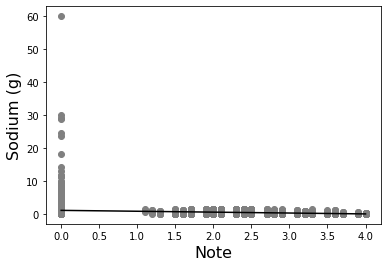

In [96]:
Y = val_analyse['Sodium_p']
X = val_analyse[['Note']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Note'],result.params['intercept']
r_2= (st.pearsonr(val_analyse["Note"],val_analyse["Sodium_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Note")
var_2.append("Sodium_p")
pear.append((st.pearsonr(val_analyse["Note"],val_analyse["Sodium_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_analyse["Note"], y=val_analyse["Sodium_p"], color="gray", label="Sodium = f(Note)")
plt.plot(np.arange(5),[a*x+b for x in np.arange(5)], color="black", label="Regression \nlinéaire")
plt.xlabel("Note", fontsize = 16)
plt.ylabel("Sodium (g)", fontsize = 16)
plt.show()

L'équation de régression linéaire s'écrit -0.3x + 1. Le coefficient R² vaut 0.388


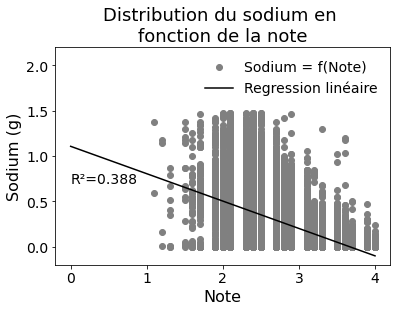

In [97]:
Y = val_reg['Sodium_p']
X = val_reg[["Note"]]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Note'],result.params['intercept']
r_2= (st.pearsonr(val_reg["Note"],val_reg["Sodium_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Note_non_nulle")
var_2.append("Sodium_p")
pear.append((st.pearsonr(val_reg["Note"],val_reg["Sodium_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_reg["Note"], y=val_reg["Sodium_p"], color="gray", label="Sodium = f(Note)")
plt.plot(np.arange(5),[a*x+b for x in np.arange(5)], color="black", label="Regression linéaire")
plt.xlabel("Note", fontsize = 16)
plt.ylabel("Sodium (g)", fontsize = 16)
plt.xticks([0,1,2,3,4],fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-0.2,2.2)
plt.legend(fontsize=14, frameon=False, loc=0)
plt.title("Distribution du sodium en \nfonction de la note", fontsize=18)
plt.text(0,0.7, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.show()

<a class="anchor" id="section_2_4_4"></a>
### Note et fibre

L'équation de régression linéaire s'écrit -1.39x + 5. Le coefficient R² vaut 0.193


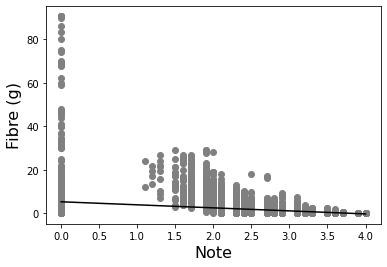

In [98]:
Y = val_analyse['Fibre_p']
X = val_analyse[['Note']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Note'],result.params['intercept']
r_2= (st.pearsonr(val_analyse["Note"],val_analyse["Fibre_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Note")
var_2.append("Fibre_p")
pear.append((st.pearsonr(val_analyse["Note"],val_analyse["Fibre_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_analyse["Note"], y=val_analyse["Fibre_p"], color="gray", label="Fibre = f(Note)")
plt.plot(np.arange(5),[a*x+b for x in np.arange(5)], color="black", label="Regression \nlinéaire")
plt.xlabel("Note", fontsize = 16)
plt.ylabel("Fibre (g)", fontsize = 16)
plt.show()

L'équation de régression linéaire s'écrit -2.19x + 8. Le coefficient R² vaut 0.388


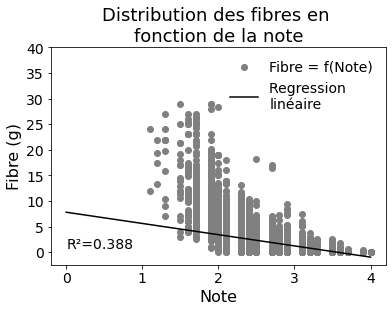

In [99]:
Y = val_reg['Fibre_p']
X = val_reg[["Note"]]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Note'],result.params['intercept']
r_2= (st.pearsonr(val_reg["Note"],val_reg["Fibre_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Note_non_nulle")
var_2.append("Fibre_p")
pear.append((st.pearsonr(val_reg["Note"],val_reg["Fibre_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_reg["Note"], y=val_reg["Fibre_p"], color="gray", label="Fibre = f(Note)")
plt.plot(np.arange(5),[a*x+b for x in np.arange(5)], color="black", label="Regression \nlinéaire")
plt.xlabel("Note", fontsize = 16)
plt.ylabel("Fibre (g)", fontsize = 16)
plt.xticks([0,1,2,3,4],fontsize=14)
plt.yticks([0,5,10,15,20,25,30,35,40],fontsize=14)
#plt.ylim(-0.2,2.2)
plt.legend(fontsize=14, frameon=False, loc=0)
plt.title("Distribution des fibres en \nfonction de la note", fontsize=18)
plt.text(0,0.7, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.show()

291.815664873101 1.9987959871059422


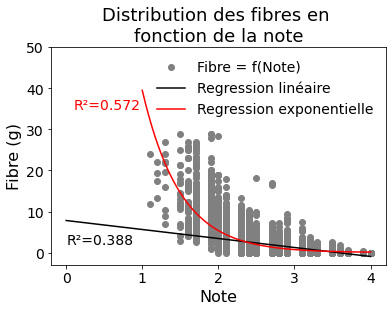

In [100]:
x = val_reg['Note']
y = val_reg['Fibre_p']

def func(x, a, b, ):
    return a*np.exp(-b*x)

x_f = np.linspace(1, 4, 500)
x_f = np.array(x_f, dtype=float)
popt, pcov = curve_fit(func, x, y)

print (popt[0], popt[1])
reg_exp = (r2_score(y, [popt[0]*np.exp(-popt[1]*z) for z in x]))
#plt.title(f"{round(popt[0],2)}*exp({round(popt[1],2)}*x) + {round(popt[2],2)} ",fontsize=16)
plt.scatter(x=val_reg["Note"], y=val_reg["Fibre_p"], color="gray", label="Fibre = f(Note)")
plt.plot(np.arange(5),[a*x+b for x in np.arange(5)], color="black", label="Regression linéaire")
plt.plot(x_f, func(x_f, *popt), label="Regression exponentielle", color="red")
plt.xlabel("Note", fontsize=16)
plt.ylabel("Fibre (g)", fontsize=16)
plt.xticks([0,1,2,3,4],fontsize=14)
plt.yticks([0,10,20,30,40,50],fontsize=14)
#plt.xlim(-1,25)
#plt.ylim(-5,45)
plt.legend(fontsize=14, frameon=False, loc=1)
plt.title("Distribution des fibres en \nfonction de la note", fontsize=18)
plt.text(0,2, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.text(0.1,35, f"R²={round(reg_exp,3)}", color ="red", fontsize=14)
plt.show()

<a class="anchor" id="section_2_4_5"></a>
### Note et protéine

L'équation de régression linéaire s'écrit -4.65x + 19. Le coefficient R² vaut 0.309


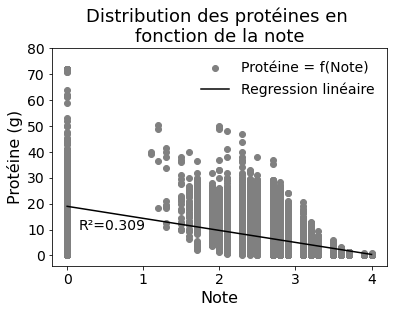

In [101]:
Y = val_analyse['Protéine_p']
X = val_analyse[['Note']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Note'],result.params['intercept']
r_2= (st.pearsonr(val_analyse["Note"],val_analyse["Protéine_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Note")
var_2.append("Protéine_p")
pear.append((st.pearsonr(val_analyse["Note"],val_analyse["Protéine_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_analyse["Note"], y=val_analyse["Protéine_p"], label="Protéine = f(Note)", color="gray")
plt.plot(np.arange(5),[a*x+b for x in np.arange(5)], color="black", label = "Regression linéaire")
plt.xlabel("Note", fontsize=16)
plt.ylabel("Protéine (g)", fontsize=16)
plt.xticks([0,1,2,3,4],fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-4,80)
plt.legend(fontsize=14, frameon=False, loc=1)
plt.title("Distribution des protéines en \nfonction de la note", fontsize=18)
plt.text(0.15,10, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.show()

L'équation de régression linéaire s'écrit -8.43x + 31. Le coefficient R² vaut 0.502


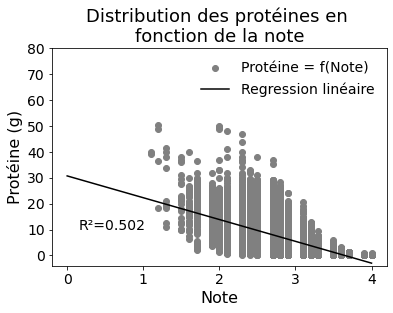

In [102]:
Y = val_reg['Protéine_p']
X = val_reg[["Note"]]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Note'],result.params['intercept']
r_2= (st.pearsonr(val_reg["Note"],val_reg["Protéine_p"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Note_non_nulle")
var_2.append("Protéine_p")
pear.append((st.pearsonr(val_reg["Note"],val_reg["Protéine_p"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_reg["Note"], y=val_reg["Protéine_p"], label="Protéine = f(Note)", color="gray")
plt.plot(np.arange(5),[a*x+b for x in np.arange(5)], color="black", label = "Regression linéaire")
plt.xlabel("Note", fontsize=16)
plt.ylabel("Protéine (g)", fontsize=16)
plt.xticks([0,1,2,3,4],fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-4,80)
plt.legend(fontsize=14, frameon=False, loc=1)
plt.title("Distribution des protéines en \nfonction de la note", fontsize=18)
plt.text(0.15,10, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.show()

C:\Users\farid\Anaconda\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


193.4117730521681 1.2418125953445296


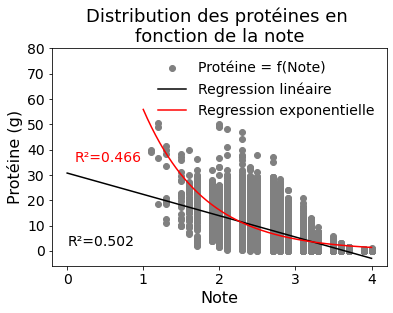

In [103]:
x = val_reg['Note']
y = val_reg['Protéine_p']

def func(x, a, b, c,d):
    return a*np.exp(-b*x)

x_f = np.linspace(1, 4, 500)
x_f = np.array(x_f, dtype=float)
popt, pcov = curve_fit(func, x, y)

print (popt[0], popt[1])
reg_exp = (r2_score(y, [popt[0]*np.exp(-popt[1]*z) for z in x]))
#plt.title(f"{round(popt[0],2)}*exp({round(popt[1],2)}*x) + {round(popt[2],2)} ",fontsize=16)
plt.scatter(x=val_reg["Note"], y=val_reg["Protéine_p"], color="gray", label="Protéine = f(Note)")
plt.plot(np.arange(5),[a*x+b for x in np.arange(5)], color="black", label="Regression linéaire")
plt.plot(x_f, func(x_f, *popt), label="Regression exponentielle", color="red")
plt.xlabel("Note", fontsize=16)
plt.ylabel("Protéine (g)", fontsize=16)
plt.xticks([0,1,2,3,4],fontsize=14)
plt.yticks([0,10,20,30,40,50,60,70,80],fontsize=14)
#plt.xlim(-1,25)
#plt.ylim(-5,45)
plt.legend(fontsize=14, frameon=False, loc=1)
plt.title("Distribution des protéines en \nfonction de la note", fontsize=18)
plt.text(0,2, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.text(0.1,35, f"R²={round(reg_exp,3)}", color ="red", fontsize=14)
plt.show()

<a class="anchor" id="section_2_4_6"></a>
### Note et score négatif

L'équation de régression linéaire s'écrit 1.63x + 13. Le coefficient R² vaut 0.552


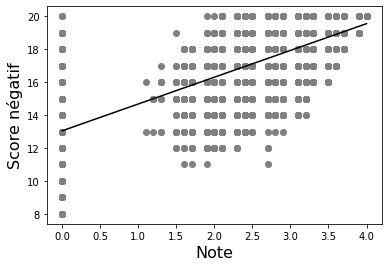

In [104]:
Y = val_analyse['Val_neg']
X = val_analyse[['Note']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Note'],result.params['intercept']
r_2= (st.pearsonr(val_analyse["Note"],val_analyse["Val_neg"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Note")
var_2.append("Val_neg")
pear.append((st.pearsonr(val_analyse["Note"],val_analyse["Val_neg"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_analyse["Note"], y=val_analyse["Val_neg"], color="gray", label="SN = f(Note)")
plt.plot(np.arange(5),[a*x+b for x in np.arange(5)], color="black", label="Regression \nlinéaire")
plt.xlabel("Note", fontsize = 16)
plt.ylabel("Score négatif", fontsize = 16)
plt.show()

L'équation de régression linéaire s'écrit 1.9x + 12. Le coefficient R² vaut 0.427


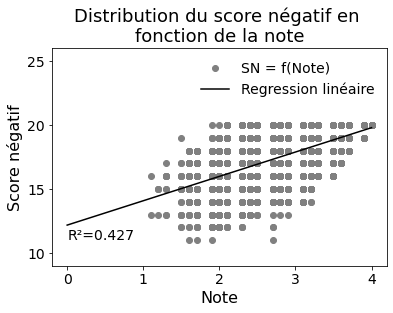

In [105]:
Y = val_reg['Val_neg']
X = val_reg[["Note"]]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Note'],result.params['intercept']
r_2= (st.pearsonr(val_reg["Note"],val_reg["Val_neg"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Note_non_nulle")
var_2.append("Val_neg")
pear.append((st.pearsonr(val_reg["Note"],val_reg["Val_neg"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_reg["Note"], y=val_reg["Val_neg"], color="gray", label="SN = f(Note)")
plt.plot(np.arange(5),[a*x+b for x in np.arange(5)], color="black", label="Regression linéaire")
plt.xlabel("Note", fontsize = 16)
plt.ylabel("Score négatif", fontsize = 16)
plt.xticks([0,1,2,3,4],fontsize=14)
plt.yticks([10,15,20,25],fontsize=14)
plt.ylim(9,26)
plt.legend(fontsize=14, frameon=False, loc=1)
plt.title("Distribution du score négatif en \nfonction de la note", fontsize=18)
plt.text(0,11, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.show()

<a class="anchor" id="section_2_4_7"></a>
### Note et score positif

L'équation de régression linéaire s'écrit 2.49x + 7. Le coefficient R² vaut 0.402


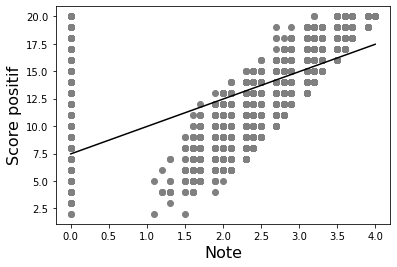

In [106]:
Y = val_analyse['Val_pos']
X = val_analyse[['Note']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Note'],result.params['intercept']
r_2= (st.pearsonr(val_analyse["Note"],val_analyse["Val_pos"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Note")
var_2.append("Val_pos")
pear.append((st.pearsonr(val_analyse["Note"],val_analyse["Val_pos"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_analyse["Note"], y=val_analyse["Val_pos"], color="gray", label="SP = f(Note)")
plt.plot(np.arange(5),[a*x+b for x in np.arange(5)], color="black", label="Regression \nlinéaire")
plt.xlabel("Note", fontsize = 16)
plt.ylabel("Score positif", fontsize = 16)
plt.show()

L'équation de régression linéaire s'écrit 5.6x + -2. Le coefficient R² vaut 0.864


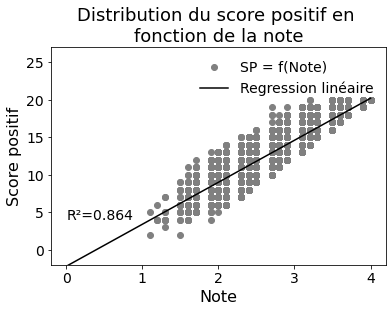

In [107]:
Y = val_reg['Val_pos']
X = val_reg[["Note"]]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Note'],result.params['intercept']
r_2= (st.pearsonr(val_reg["Note"],val_reg["Val_pos"])[0])**2
print(f"L'équation de régression linéaire s'écrit {round(a,2)}x + {round(b)}. Le coefficient R² vaut {round(r_2,3)}")

var_1.append("Note_non_nulle")
var_2.append("Val_pos")
pear.append((st.pearsonr(val_reg["Note"],val_reg["Val_pos"])[0]))
reg_lin.append(r_2)

plt.scatter(x=val_reg["Note"], y=val_reg["Val_pos"], color="gray", label="SP = f(Note)")
plt.plot(np.arange(5),[a*x+b for x in np.arange(5)], color="black", label="Regression linéaire")
plt.xlabel("Note", fontsize = 16)
plt.ylabel("Score positif", fontsize = 16)
plt.xticks([0,1,2,3,4],fontsize=14)
plt.yticks([0,5,10,15,20,25],fontsize=14)
plt.ylim(-2,27)
plt.legend(fontsize=14, frameon=False, loc=1)
plt.title("Distribution du score positif en \nfonction de la note", fontsize=18)
plt.text(0,4, f"R²={round(r_2,3)}", color ="black", fontsize=14)
plt.show()

In [108]:
bilan_biv = pd.DataFrame(list(zip(var_1,var_2,pear,reg_lin)), columns = ['X', 'Y', "Pearson","R²"])
bilan_biv[["Pearson","R²"]] = bilan_biv[["Pearson","R²"]].round(3)
display(bilan_biv.sort_values("Pearson", ascending = True))
#display(var_2)
#display(pear)
#display(reg_lin)

,X,Y,Pearson,R²
5,Val_neg,Energie_p,-0.800,0.640
20,Note_non_nulle,Protéine_p,-0.708,0.502
13,Note,Energie_p,-0.705,0.498
14,Note_non_nulle,Energie_p,-0.665,0.442
7,Val_pos,Protéine_p,-0.626,0.392
18,Note_non_nulle,Fibre_p,-0.623,0.388
16,Note_non_nulle,Sodium_p,-0.622,0.388
2,Val_neg,Glucide_p,-0.597,0.357
19,Note,Protéine_p,-0.556,0.309
6,Val_pos,Fibre_p,-0.523,0.274


Les courbes montrées précedemment montre qu'il y a une (anti-)corrélation entre les notes et /le score positif/le score négatif et la plupart des nutriments. 

Ce sont des résultats attendus dans la mesure où les notes sont une somme des scores positifs et négatifs. De ce fait, si les scores positifs ou les scores négatifs augmentent, alors les notes augmenteront. 

Nous pouvons aussi observer des corrélations entre les glucides/protéines/AGS et l'énergie. Il est assez normal d'avoir une corrélation car le fait d'avoir des glucides dans un produit induit une transformation de ces derniers en énergie. Il en est de même avec les protéines/AGS et l'énergie.

Enfin, le sucre et les glucides sont corrélés car la valeur en sucre est toujours inclus dans la valeur des glucides. Les sucres représentent donc une borne inférieure pour les glucides.

Afin d'étudier plus en profondeur nos données, nous faisons une étude multivariée en effectuant une Analyse en Composante Principale (ACP)

<a class="anchor" id="chapter3"></a>
# Chapitre 3 : Analyse en Composante Principales

Afin de savoir s'il y a des corrélations entre chaque variable, nous effectuons une Analyse des Composantes Principales (ACP). Cela permet notamment de réduire le nombre de variables.
<a class="anchor" id="section_3_1"></a>
## Création des fonctions
Dans un premier temps, nous créeons des fonctions pour traçer le cercle des corrélations ainsi que la projection des individus.

In [109]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x, y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(7, 7))
    color_r = ["limegreen","mediumseagreen", "royalblue","deepskyblue","magenta", "black", "dimgrey","goldenrod",
               "olive","crimson"]
    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.04,
                head_length=0.04, 
                width=0.007,
                color = color_r[i])

        # Les labels
        if (pca.components_[x, i]>=0) & (pca.components_[y, i]>=0):
            plt.text(pca.components_[x, i] + 0.03,
                     pca.components_[y, i] + (0.03*1/(i+1)),
                     features[i],
                     color = color_r[i],
                     weight='bold',
                     fontsize=13)
        elif (pca.components_[x, i]>=0) & (pca.components_[y, i]<0):
            plt.text(pca.components_[x, i] + 0.03,
                     pca.components_[y, i] - 0.006*i,
                     features[i],
                     color = color_r[i],
                     weight='bold',
                     fontsize=13)
        elif (pca.components_[x, i]<0) & (pca.components_[y, i]>=0):
            plt.text(pca.components_[x, i] - 0.03,
                     pca.components_[y, i] + 0.03,
                     features[i],
                     color = color_r[i],
                     weight='bold',
                     fontsize=13)
        elif (pca.components_[x, i]<0) & (pca.components_[y, i]<0):
            plt.text(pca.components_[x, i] - 0.08,
                     pca.components_[y, i] - 0.08,
                     features[i],
                     color = color_r[i],
                     weight='bold',
                     fontsize=13)
    
    custom_lines = [Line2D([0], [0], color=color_r[0], lw=3),
                    Line2D([0], [0], color=color_r[1], lw=3),
                    Line2D([0], [0], color=color_r[2], lw=3),
                    Line2D([0], [0], color=color_r[3], lw=3),
                    Line2D([0], [0], color=color_r[4], lw=3),
                    Line2D([0], [0], color=color_r[5], lw=3),
                    Line2D([0], [0], color=color_r[6], lw=3),
                    Line2D([0], [0], color=color_r[7], lw=3),
                    Line2D([0], [0], color=color_r[8], lw=3),
                    Line2D([0], [0], color=color_r[9], lw=3)]  
    
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({} %)'.format(x+1, round(100*pca.explained_variance_ratio_[x])),fontsize = 16)
    plt.ylabel('F{} ({} %)'.format(y+1, round(100*pca.explained_variance_ratio_[y])),fontsize = 16)


    # Titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1), fontsize = 18)

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an), c="black")  # Add a unit circle for scale

    # Axes et affichage
    plt.axis('scaled')
    plt.legend(custom_lines,features, frameon=False, bbox_to_anchor=(1, 1), fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show(block=False)

In [110]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[7,7], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque 
    composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,7)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1,figsize=(7,6))

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    plt.scatter(   X_[:, x], 
                        X_[:, y], 
                        alpha=alpha, 
                        c="grey", 
                        cmap="Set1", 
                        marker=marker)


    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} ({v1})', fontsize = 16)
    ax.set_ylabel(f'F{y+1} ({v2})', fontsize = 16)

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})", fontsize = 18)
    plt.show()

In [111]:
val_analyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54008 entries, 0 to 54007
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pnns_groups_1  54008 non-null  object 
 1   pnns_groups_2  54008 non-null  object 
 2   Sucre          54008 non-null  float64
 3   Glucide        54008 non-null  float64
 4   Energie        54008 non-null  float64
 5   Sodium         54008 non-null  float64
 6   A_G_Saturés    54008 non-null  float64
 7   Fibre          54008 non-null  float64
 8   Protéine       54008 non-null  float64
 9   Sucre_p        54008 non-null  float64
 10  Glucide_p      54008 non-null  float64
 11  Energie_p      54008 non-null  float64
 12  Sodium_p       54008 non-null  float64
 13  A_G_Saturés_p  54008 non-null  float64
 14  Fibre_p        54008 non-null  float64
 15  Protéine_p     54008 non-null  float64
 16  Val_neg        54008 non-null  float64
 17  Val_pos        54008 non-null  float64
 18  Note  

<a class="anchor" id="section_3_2"></a>
## Cercle des corrélations et projection des individus

Nous allons déterminer l'eboulis des valeurs propres pour savoir combien de composantes sont nécessaires pour obtenir la variable note en limitant la perte d'information.
<a class="anchor" id="section_3_2_1"></a>
### Eboulis des valeurs propres

array([42.65, 18.83, 12.76,  8.26,  5.77,  4.52,  2.85,  2.24,  1.38,
        0.74])

array([ 43.,  61.,  74.,  82.,  88.,  93.,  96.,  98.,  99., 100.])

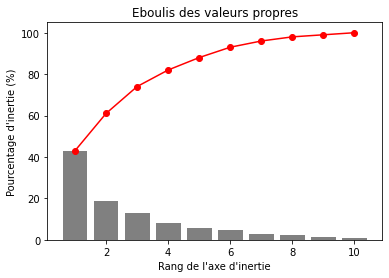

In [112]:
colon = ["Sucre_p","Glucide_p","Energie_p","Sodium_p","A_G_Saturés_p","Fibre_p","Protéine_p","Val_neg", "Val_pos","Note"]
X = val_analyse[colon].values
names = val_analyse[colon].index
features = ["Sucre","Glucide","Energie","Sodium","A.G.Sat","Fibre","Protéine","Score_N", "Score_P","Note"]
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

n_components = val_analyse[colon].shape[1]
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
display(scree)
scree_cum = scree.cumsum().round()
display(scree_cum)


x_list = range(1, n_components+1)
list(x_list)
plt.bar(x_list, scree, color="gray")
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie (%)")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
#display(pcs.round(2))

Ici, nous prenons uniquement les 6 premières composantes. 
Nous allons alors traçer le cercle des corrélations et la projection des individus pour les 5 composantes principales deux à deux (1 et 2, 3 et 4, 5 et 6) et les analyser.
<a class="anchor" id="section_3_2_2"></a>
### Cercle des corrélations et projection des individus

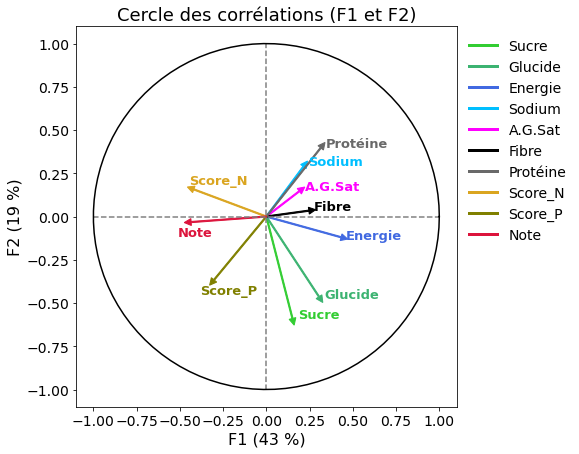

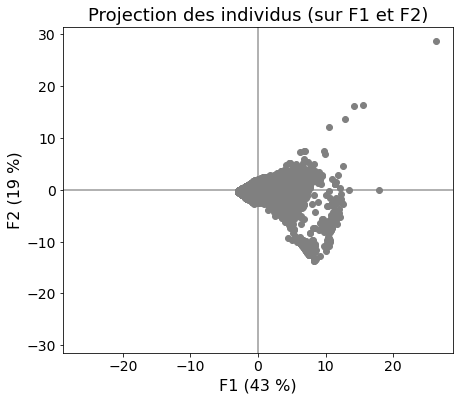

In [113]:
x_y = [0,1]
X_proj = pca.transform(X_scaled)

correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, marker="o")

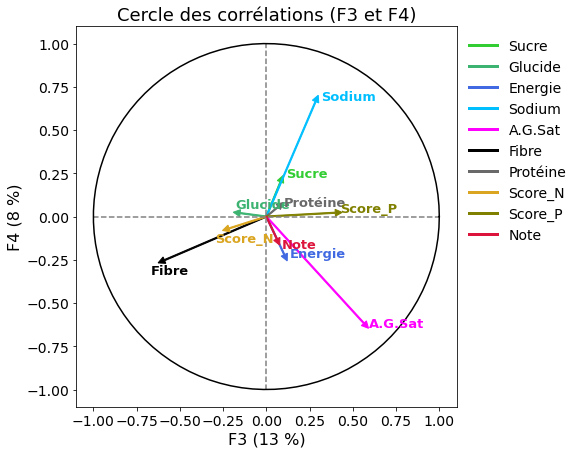

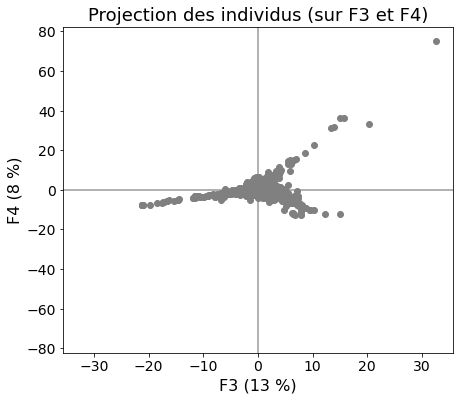

In [114]:
x_y = [2,3]
X_proj = pca.transform(X_scaled)

correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, marker="o")

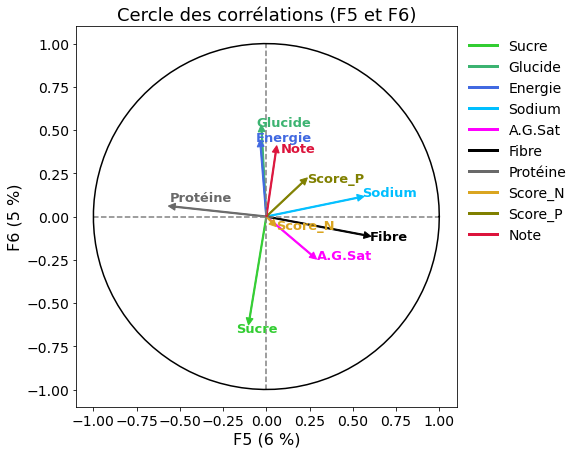

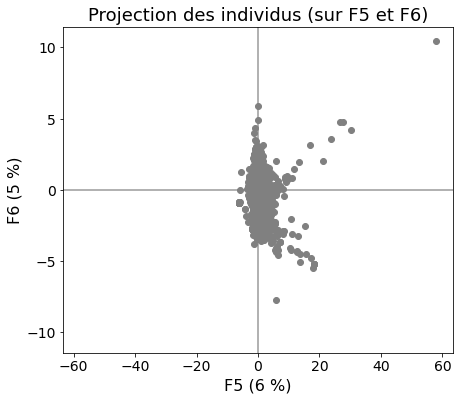

In [115]:
x_y = [4,5]
X_proj = pca.transform(X_scaled)

correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, marker="o")

Nous nous apercevons qu'il y a beaucoup de points isolés. Nous les supprimons et nous retraçons l'éboulis des valeurs propres, le cercle des corrélations ainsi que la projection des individus.

<a class="anchor" id="section_3_2_3"></a>
### Traitement  des valeurs isolées

In [116]:
cp_1 = np.where(X_proj[:,0]>=15)
cp_1_list = list(chain.from_iterable(cp_1))

cp_2 = np.where(X_proj[:,1]>=10)
cp_2_list = list(chain.from_iterable(cp_2))

cp_3 = np.where(np.abs(X_proj[:,2])>=15)
cp_3_list = list(chain.from_iterable(cp_3))

cp_4 = np.where(np.abs(X_proj[:,3])>=20)
cp_4_list = list(chain.from_iterable(cp_4))

cp_5 = np.where(np.abs(X_proj[:,4])>=20)
cp_5_list = list(chain.from_iterable(cp_5))

cp_6 = np.where(np.abs(X_proj[:,5])>=6)
cp_6_list = list(chain.from_iterable(cp_6))

liste_ = cp_1_list + cp_2_list + cp_3_list + cp_4_list + cp_5_list + cp_6_list
#print(liste_)
result = [] 
for i in liste_: 
    if i not in result: 
        result.append(i) 
#print(len(result))
#display(val_analyse.shape)
indexes_to_keep = set(range(val_analyse.shape[0])) - set(result)
val_analyse_sliced = val_analyse.take(list(indexes_to_keep))


#display(val_analyse_sliced.shape)

X_proj =[]
#print(len(X_proj))

#print(len(X_proj))
#X_proj_9 = np.delete(X_proj_8, 29477, 0)
#X_proj = []
#X_proj = X_proj_9
#print(len(X_proj))

array([44.31, 19.57, 12.99,  7.74,  4.5 ,  4.43,  2.49,  1.88,  1.37,
        0.71])

array([ 44.,  64.,  77.,  85.,  89.,  94.,  96.,  98.,  99., 100.])

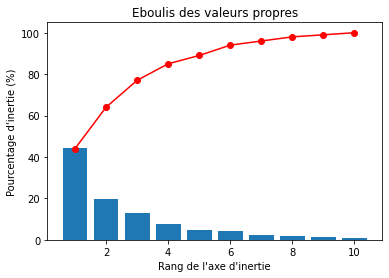

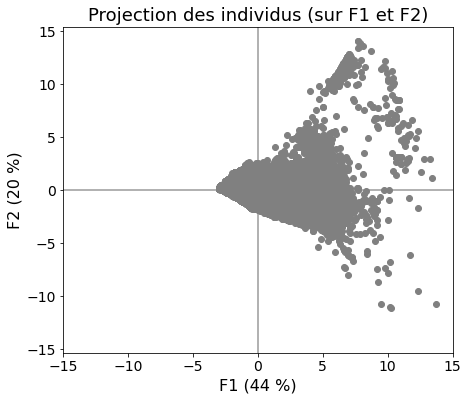

In [117]:
colon = ["Sucre_p","Glucide_p","Energie_p","Sodium_p","A_G_Saturés_p","Fibre_p","Protéine_p","Val_neg", "Val_pos","Note"]
X = val_analyse_sliced[colon].values
names = val_analyse_sliced[colon].index
features = ["Sucre","Glucide","Energie","Sodium","A.G.Sat","Fibre","Protéine","Score_N", "Score_P","Note"]
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

n_components = val_analyse_sliced[colon].shape[1]
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
display(scree)
scree_cum = scree.cumsum().round()
display(scree_cum)


x_list = range(1, n_components+1)
list(x_list)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie (%)")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
#display(pcs.round(2))

x_y = [0,1]
X_proj = pca.transform(X_scaled)

#correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, marker="o")

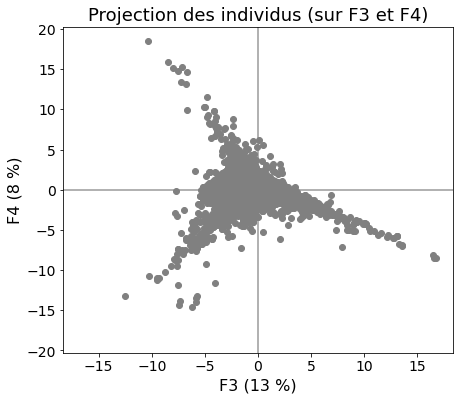

In [118]:
x_y = [2,3]
X_proj = pca.transform(X_scaled)

#correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, marker="o")

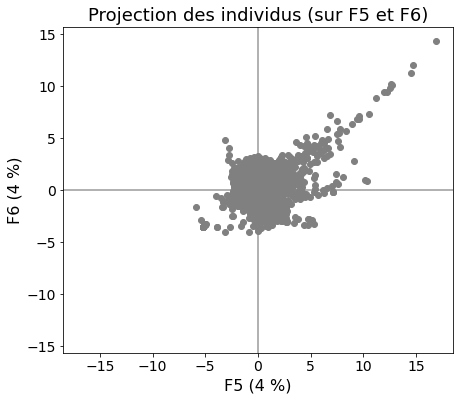

In [119]:
x_y = [4,5]
X_proj = pca.transform(X_scaled)

#correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, marker="o")

Nous pouvons voir sur les projections des individus que les points les plus isolés ne sont plus présents et donc que les points de la projection sont visuellement plus dispersés. Nous refaisons un autre traitement pour supprimer encore quelques points isolés 

array([44.83, 19.84, 13.05,  7.56,  4.47,  4.03,  2.44,  1.72,  1.37,
        0.7 ])

array([ 45.,  65.,  78.,  85.,  90.,  94.,  96.,  98.,  99., 100.])

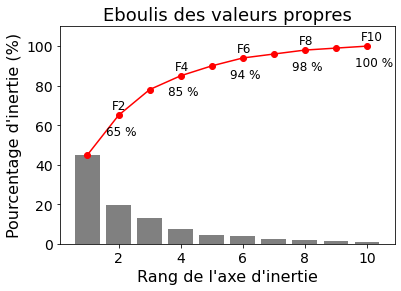

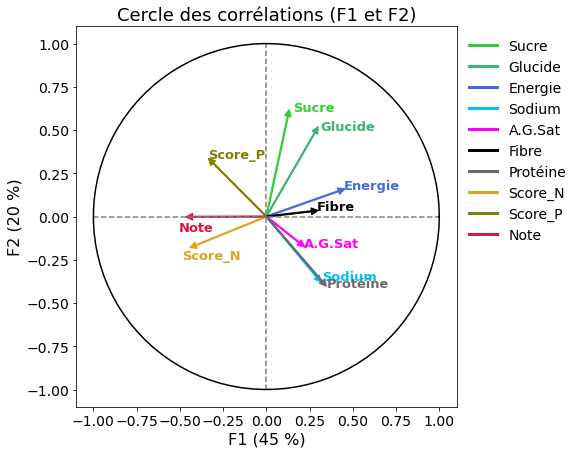

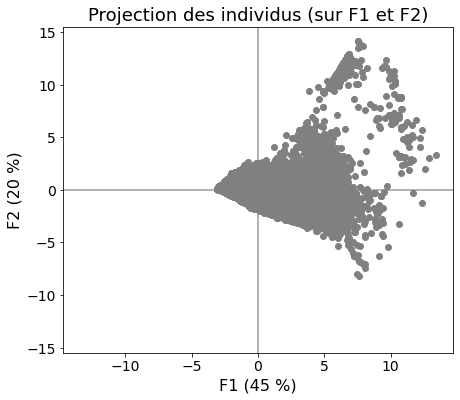

In [120]:

cp_3 = np.where((X_proj[:,2])>=15)
cp_3_list = list(chain.from_iterable(cp_3))

cp_3_2 = np.where((X_proj[:,2])<-10)
cp_3_2_list = list(chain.from_iterable(cp_3_2))

cp_4 = np.where(np.abs(X_proj[:,3])>=15)
cp_4_list = list(chain.from_iterable(cp_4))

cp_5 = np.where((X_proj[:,4])>=10)
cp_5_list = list(chain.from_iterable(cp_5))

cp_6 = np.where(X_proj[:,5]>=6)
cp_6_list = list(chain.from_iterable(cp_6))


X_proj = []
liste_ = []
liste_ = cp_3_list + cp_4_list + cp_5_list + cp_6_list + cp_3_2_list

#result = [] 
for i in liste_: 
    if i not in result: 
        result.append(i) 
#print(sorted(result))
#print(len(result))
#display(val_analyse.shape)
indexes_to_keep =[]
indexes_to_keep = set(range(val_analyse_sliced.shape[0])) - set(result)
val_analyse_sliced_2 = val_analyse_sliced.take(list(indexes_to_keep))
#display(val_analyse_sliced_2.shape)

colon = ["Sucre_p","Glucide_p","Energie_p","Sodium_p","A_G_Saturés_p","Fibre_p","Protéine_p","Val_neg", "Val_pos","Note"]
X = val_analyse_sliced_2[colon].values
names = val_analyse_sliced_2[colon].index
features = ["Sucre","Glucide","Energie","Sodium","A.G.Sat","Fibre","Protéine","Score_N", "Score_P","Note"]
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

n_components = val_analyse_sliced_2[colon].shape[1]
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
display(scree)
scree_cum = scree.cumsum().round()
display(scree_cum)


x_list = range(1, n_components+1)
list(x_list)
plt.bar(x_list, scree, color ="gray")
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie", fontsize=16)
plt.ylabel("Pourcentage d'inertie (%)",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,110)
plt.title("Eboulis des valeurs propres",fontsize=18)
for a,b in zip(x_list[1::2], scree_cum[1::2]): 
    plt.text(a-0.4, b-10, f"{int(b)} %",fontsize=12)
    plt.text(a-0.2, b+3, f"F{int(a)}",fontsize=12)
plt.show(block=False)

pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
#display(pcs.round(2))

x_y = [0,1]
X_proj = pca.transform(X_scaled)

correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, marker="o")

Nous pouvons observer sur le cercle des corrélations que :
- les notes sont anti-corrélées avec l'axe F1
- l'énergie(et très légérement les fibres) sont corrélés à l'axe F1
- le sucre et les glucides sont corrélés à l'axe F2 à l'inverse du sodium et des protéines qui sont anti-corrélés à l'axe F2.

D'un point de vue global, nous pouvons observer une opposition entre les notes et l'énergie d'une part, ainsi qu'entre le sucre et les glucides et les protéines et le sodium.
Nous pouvons aussi observer une opposition entre les notes, les scores (postifis et négatifs) et les nutriments. Cela est tout à fait attendu car elle est corrélée au fait que les notes augmentent lorsque la quantité en nutriment diminue.

Nous calculons aussi le pourcentage d'individus dans chaque quart de la projection des individus

In [121]:
n_e = np.where(((X_proj[:,0])>0) & ((X_proj[:,1])>0))
n_e_list = list(chain.from_iterable(n_e))

s_e = np.where(((X_proj[:,0])>0) & ((X_proj[:,1])<0))
s_e_list = list(chain.from_iterable(s_e))

n_o = np.where(((X_proj[:,0])<0) & ((X_proj[:,1])>0))
n_o_list = list(chain.from_iterable(n_o))

s_o = np.where(((X_proj[:,0])<0) & ((X_proj[:,1])<0))
s_o_list = list(chain.from_iterable(s_o))

n_n = np.where(((X_proj[:,0])==0) | ((X_proj[:,1])==0))
n_n_list = list(chain.from_iterable(n_n))
print(len(n_n_list))
print(len(n_e_list),len(s_e_list), len(n_o_list), len(s_o_list))
somme = len(n_e_list) + len(s_e_list) + len(n_o_list) + len(s_o_list)
print(somme)
display(val_analyse_sliced_2.shape)

nbr_n_e = round(len(n_e_list)*100/val_analyse_sliced_2.shape[0],1)
nbr_s_e = round(len(s_e_list)*100/val_analyse_sliced_2.shape[0],1)
nbr_n_o = round(len(n_o_list)*100/val_analyse_sliced_2.shape[0],1)
nbr_s_o = round(len(s_o_list)*100/val_analyse_sliced_2.shape[0],1)

print(nbr_n_e, nbr_s_e, nbr_n_o, nbr_s_o)

0
8330 13621 20088 11902
53941


(53941, 20)

15.4 25.3 37.2 22.1


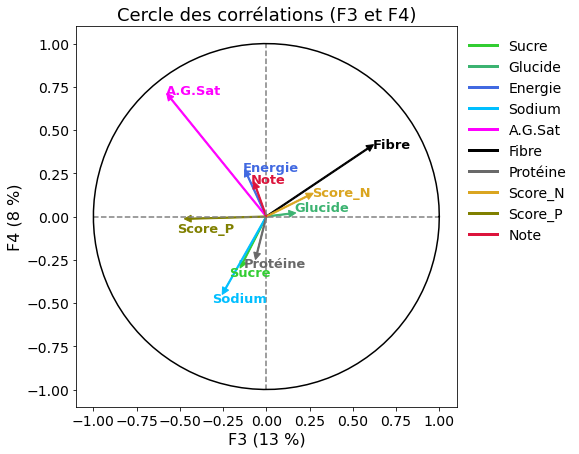

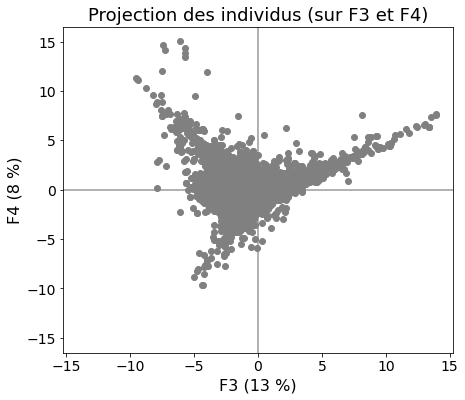

In [122]:
x_y = [2,3]
X_proj = pca.transform(X_scaled)

correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, marker="o")

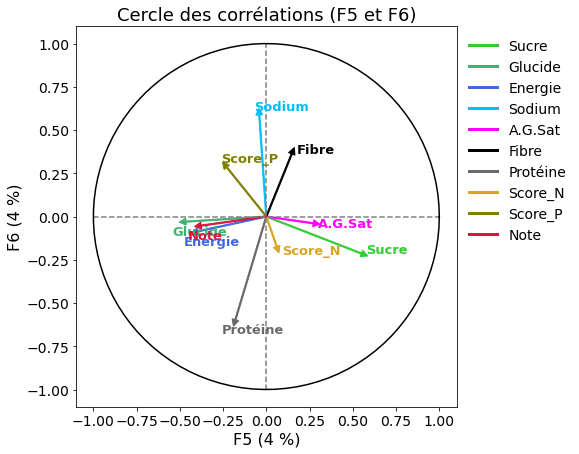

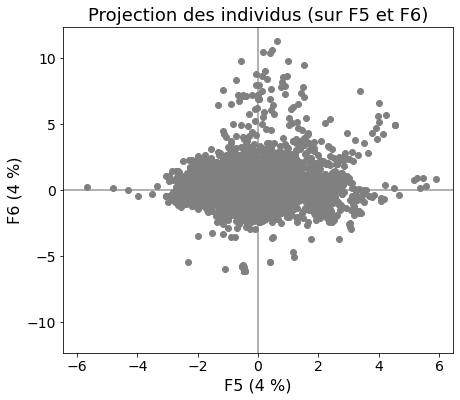

In [123]:
x_y = [4,5]
X_proj = pca.transform(X_scaled)

correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, marker="o")

<a class="anchor" id="section_3_3"></a>
## Composantes moins pertinentes

In [124]:
x_y = [2,3]
X_proj = pca.transform(X_scaled)

#correlation_graph(pca, x_y, features)
#display_factorial_planes(X_proj, x_y, pca, marker="o")

<a class="anchor" id="section_3_2_2_3"></a>
#### Cercle des corrélations pour F1 et F3

In [125]:
x_y = [0,2]
X_proj = pca.transform(X_scaled)

#correlation_graph(pca, x_y, features)
#display_factorial_planes(X_proj, x_y, pca, marker="o")

<a class="anchor" id="section_3_2_2_4"></a>
#### Cercle des corrélations pour F1 et F4

In [126]:
x_y = [0,3]
X_proj = pca.transform(X_scaled)

#correlation_graph(pca, x_y, features)
#display_factorial_planes(X_proj, x_y, pca, marker="o")

<a class="anchor" id="section_3_2_2_5"></a>
#### Cercle des corrélations pour F1 et F5

In [127]:
x_y = [0,4]
X_proj = pca.transform(X_scaled)

#correlation_graph(pca, x_y, features)
#display_factorial_planes(X_proj, x_y, pca, marker="o")

<a class="anchor" id="section_3_2_2_6"></a>
#### Cercle des corrélations pour F2 et F3

In [128]:
x_y = [1,2]
X_proj = pca.transform(X_scaled)

#correlation_graph(pca, x_y, features)
#display_factorial_planes(X_proj, x_y, pca, marker="o")

<a class="anchor" id="section_3_2_2_7"></a>
#### Cercle des corrélations pour F2 et F4

In [129]:
x_y = [1,3]
X_proj = pca.transform(X_scaled)

#correlation_graph(pca, x_y, features)
#display_factorial_planes(X_proj, x_y, pca, marker="o")

<a class="anchor" id="section_3_2_2_8"></a>
#### Cercle des corrélations pour F2 et F5

In [130]:
x_y = [1,4]
X_proj = pca.transform(X_scaled)

#correlation_graph(pca, x_y, features)
#display_factorial_planes(X_proj, x_y, pca, marker="o")

<a class="anchor" id="section_3_2_2_10"></a>
#### Cercle des corrélations pour F3 et F5

In [131]:
x_y = [2,4]
X_proj = pca.transform(X_scaled)

#correlation_graph(pca, x_y, features)
#display_factorial_planes(X_proj, x_y, pca, marker="o")

<a class="anchor" id="section_3_2_2_11"></a>
#### Cercle des corrélations pour F4 et F5

In [132]:
x_y = [3,4]
X_proj = pca.transform(X_scaled)

#correlation_graph(pca, x_y, features)
#display_factorial_planes(X_proj, x_y, pca, marker="o")

Maintenant que les données sont prêtes, nous pouvons commencer à mettre en place un début d'application. 
<a class="anchor" id="chapter4"></a>
# Chapitre 4 : Mise en place de l'application
<a class="anchor" id="section_4_1"></a>
## Création de fonction
Pour rappel, l'application a pour but d'évaluer la quantité en sucre d'un produit présent dans la base de données. Selon la quantité de sucre et le quartile où se trouve le produit:
- soit un radar, la note, le nutriscore et le score du produit sera montré, 
- soit une comparaison entre le produit (s'il est considéré comme insatisfaisant) et un produit présent dans le premier quartile sera faite et nous montrerons comme précedemment le radar, la note, le nutriscore et le score.
En revanche, si le produit n'est pas dans la base de données, nous demanderons à l'utilisateur de rentrer la catégorie dans laquelle se trouve le produit, puis les valeurs nutritionnelles du produit inconnu. Ensuite, une note et un score sera calculée et nous proposerons un produit de la même catégorie présent dans le premier quartile. Il est à noter que le produit inconnu ne sera pas inséré dans la base de données.


Avant de programmer tout cela, il faut d'abod créer une fonction pour calculer la note et le score et une nous créeons aussi une liste de choix de catégories pour les produits inconnus.

In [133]:
def note_produit_nouveau(portion, suc, glu, ene, ags, sod, fib, prot):
    note_prod = []
    suc_p = suc*100/port
    glu_p = glu*100/port
    ene_p = ene*100/port
    ags_p = ags*100/port
    sod_p = sod*100/port
    fib_p = fib*100/port
    prot_p = prot*100/port
   
    if (ene == 0) :
        glu_ene = 0
        ags_ene = 0
        prot_ene = 0
    else:
        glu_ene = glu_p*100/ene_p
        ags_ene = ags_p*100/ene_p
        prot_ene = prot_p*100/ene_p
    
    if (suc_p>=0) & (suc_p<5):
        note_suc = 4
    elif (suc_p>=5) & (suc_p<10):
        note_suc = 3
    elif (suc_p>=10) & (suc_p<20):
        note_suc = 2
    elif (suc_p>=20) & (suc_p<30):
        note_suc = 1
    elif (suc_p>=30):
        note_suc = 0
    
    if (ene_p>=0) & (ene_p<350):
        note_ene = 4
    elif (ene_p>=350) & (ene_p<700):
        note_ene = 3
    elif (ene_p>=700) & (ene_p<1400):
        note_ene = 2
    elif (ene_p>=1400) & (ene_p<2100):
        note_ene = 1
    elif (ene_p>=2100):
        note_ene = 0
                
    if (sod_p>=0) & (sod_p<0.25):
        note_sod = 4
    elif (sod_p>=0.25) & (sod_p<0.5):
        note_sod = 3
    elif (sod_p>=0.5) & (sod_p<1.0):
        note_sod = 2
    elif (sod_p>=1.0) & (sod_p<1.5):
        note_sod = 1
    elif (sod_p>=1.5):
        note_sod = 0
                
    if (fib_p==0):
        note_fib = 10
    elif (fib_p>0) & (fib_p<0.5):
        note_fib = 9
    elif (fib_p>=0.5) & (fib_p<1):
        note_fib = 8
    elif (fib_p>=1) & (fib_p<2):
        note_fib = 7
    elif (fib_p>=2) & (fib_p<3):
        note_fib = 6
    elif (fib_p>=3) & (fib_p<4):
        note_fib = 5
    elif (fib_p>=4) & (fib_p<5):
        note_fib = 4
    elif (fib_p>=5) & (fib_p<10):
        note_fib = 3
    elif (fib_p>=10) & (fib_p<20):
        note_fib = 2
    elif (fib_p>=20) & (fib_p<30):
        note_fib = 1
    elif (fib_p>=30):
        note_fib = 0
        
    if (glu_ene>=0) & (glu_ene<7.5):
        note_glu = 4
    elif (glu_ene>=7.5) & (glu_ene<13):
        note_glu = 3
    elif (glu_ene>=13) & (glu_ene<26):
        note_glu = 2
    elif (glu_ene>=26) & (glu_ene<40):
        note_glu = 1
    elif (glu_ene>=40):
        note_glu = 0
    
    if (ags_ene>=0) & (ags_ene<2):
        note_ags = 4
    elif (ags_ene>=2) & (ags_ene<4):
        note_ags = 3
    elif (ags_ene>=4) & (ags_ene<8):
        note_ags = 2
    elif (ags_ene>=8) & (ags_ene<12):
        note_ags = 1
    elif (ags_ene>=12):
        note_ags = 0
        
    if (prot_ene==0):
        note_prot = 10
    elif (prot_ene>0) & (prot_ene<0.25):
        note_prot = 9
    elif (prot_ene>=0.25) & (prot_ene<0.5):
        note_prot = 8
    elif (prot_ene>=0.5) & (prot_ene<0.75):
        note_prot = 7
    elif (prot_ene>=0.75) & (prot_ene<1):
        note_prot = 6
    elif (prot_ene>=1) & (prot_ene<1.5):
        note_prot = 5
    elif (prot_ene>=1.5) & (prot_ene<2):
        note_prot = 4
    elif (prot_ene>=2) & (prot_ene<3):
        note_prot = 3
    elif (prot_ene>=3) & (prot_ene<6):
        note_prot = 2    
    elif (prot_ene>=6) & (prot_ene<10):
        note_prot = 1
    elif (prot_ene>=10):
        note_prot = 0 
        
        
    note = note_suc + note_glu + note_ene + note_ags + note_sod + note_fib + note_prot
    if note >=39:
        note_l = "A"
    elif (note <39) & (note >=36) :
        note_l = "B"
    elif (note <36) & (note >=33) :
        note_l = "C"
    elif (note <33) & (note >=30) :
        note_l = "D"
    elif (note <30) :
        note_l = "E"
    
    note_n = note*4/40
    note_fib_n = note_fib*4/10
    note_prot_n = note_prot*4/10
    note_prod = [note_suc, note_glu, note_ene, note_ags, note_sod, note_fib_n, note_prot_n, note_n, note_suc, note_l]
    return (note_prod)
    

In [134]:
groupe_produits = {
    "1" : "Alcoholic beverages",
    "2a" : "Artificially sweetened beverages", 
    "2b" : "Fruit juices",
    "2c" : "Fruit nectars",
    "2d" : "Non-sugared beverages",
    "2e" : "Sweetened beverages",
    "3a" : "Bread",
    "3b" : "Breakfast cereals", 
    "3c" : "Cereals", 
    "3d" : "Légumineuses", 
    "3e" : "Potatoes", 
    "4a" : "One-dish meals", 
    "4b" : "Pizza pies and quiche",
    "4c" : "Sandwich",
    "5a" : "Dressings and sauces",
    "5b" : "Fats",
    "6a" : "Eggs", 
    "6b" : "Fish and seafood",
    "6c" : "Meat",
    "6d" : "Processed meat",
    "6e" : "Tripe dishes",
    "7a" : "Dried fruits", 
    "7b" : "Fruits",
    "7c" : "Soups",
    "7d" : "Vegetables",
    "8a" : "Cheese", 
    "8b" : "Dairy desserts",
    "8c" : "Ice cream",
    "8d" : "Milk and yogurt", 
    "9a" : "Appetizers", 
    "9b" : "Nuts",
    "9c" : "Salty and fatty products",
    "10a" : "Biscuits and cakes", 
    "10b" : "Chocolate products",
    "10c" : "Pastries",
    "10d" : "Sweets",
}


<a class="anchor" id="section_4_2"></a>
## Mise en place de l'application

Les fonctions dont nous avons besoin sont créées. Nous allons créer un début d'application qui suit les conditions que nous avons décrit plus haut.
Nous allons d'abord sélectionner les produits pour le test. Pour cela nous allons choisir 
- un produit se trouvant dans le 1er quartile d'une sous-catégorie
- un second produit se trouvant dans un autre quartile d'une autre sous-catégorie (avec une portion en sucre inférieure à 30 g)
- un troisième produit où la quantité de sucre pour une portion est au-delà de 30 g

Quant au dernier cas, nous allons inventer un produit.

In [138]:
import random
list_q1 = val_nutri.loc[val_nutri["Quart"]==1,"product_name"]
print(len(list_q1))
resu = []
a_jeter =[]
for i in list_q1: 
    if i not in resu: 
        resu.append(i)
    else: 
        a_jeter.append(i)
for i in a_jeter: 
    if i in resu: 
        resu.remove(i)
    else: 
        continue
print(len(resu), len(a_jeter))

choix_1 = random.randint(0, len(resu))
print(choix_1)
print(resu[choix_1])


13516
10790 1818
7997
 Boulettes à la Marocaine et légumes


In [139]:
list_q234 = val_nutri.loc[(val_nutri["Quart"]==4),"product_name"]
print(len(list_q234))
resu = []
a_jeter =[]
for i in list_q234: 
    if i not in resu: 
        resu.append(i)
    else: 
        a_jeter.append(i)
for i in a_jeter: 
    if i in resu: 
        resu.remove(i)
    else: 
        continue
print(len(resu), len(a_jeter))

choix_2 = random.randint(0, len(resu))
print(choix_2)
print(resu[choix_2])
print(val_nutri.loc[(val_nutri["product_name"]==resu[choix_2]),"Portion"].values)

13509
10826 1798
7288
Lait De Coco Sterilisé
[200]


In [140]:
list_30 = val_nutri.loc[(val_nutri["Sucre_portion"]>30),"product_name"]
print(len(list_30))
resu = []
a_jeter =[]
for i in list_30: 
    if i not in resu: 
        resu.append(i)
    else: 
        a_jeter.append(i)
for i in a_jeter: 
    if i in resu: 
        resu.remove(i)
    else: 
        continue
print(len(resu), len(a_jeter))

choix_3 = random.randint(0, len(resu))
print(choix_3)
print(resu[choix_3])
print(val_nutri.loc[(val_nutri["product_name"]==resu[choix_3]),"Portion"].values)

913
622 215
363
Glaces Mini Mix
[100]


Entrez le nom du produit: 100% pur fruit pressé Raisin
Entrez la portion estimée : 200
Pour 100% pur fruit pressé Raisin, la quantité de sucre est de [32.] g
ATTENTION : ce produit est très riche en sucres ([106.7]%)
Nous vous proposons un produit de la même catégorie moins riche en sucres :


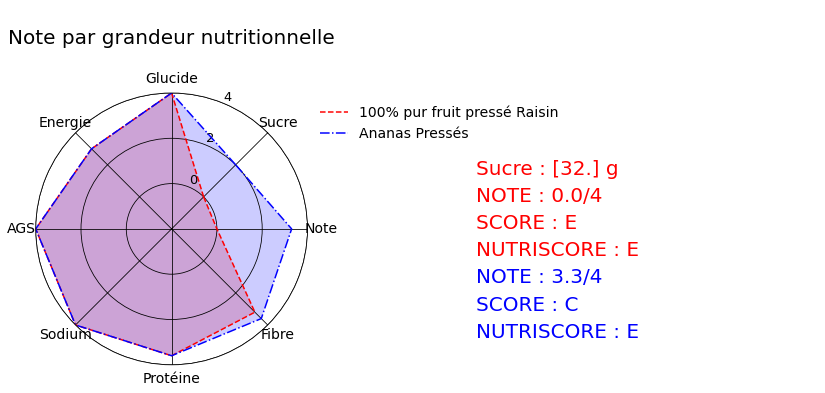

In [268]:
# Nous demandons d'entrer un nom de produit
prod = input("Entrez le nom du produit: ")

# Nous créeons une liste de catégorie pour le radar
categories = ["Sucre", "Glucide","Energie", "AGS", "Sodium","Protéine","Fibre","Note"]

# Nous vérifions si le produit est présent ou non dans la base de données. 
# Si le produit est présent plusieurs fois dans la liste de données, alors on considère que le produit n'est pas 
# dans la base de données
valeur = val_nutri.loc[val_nutri["product_name"]==prod,"product_name"].values.size
if (valeur !=0) & (valeur<=1):
    
    # Nous demandons la portion que la personne prévoit de consommer
    port = float(input("Entrez la portion estimée : "))
    
    # Nous calculons la portion de sucre pour le produit
    s = val_nutri.loc[val_nutri["product_name"]==prod,"Sucre"].values
    sucre_portion = np.round(port*s/100,1)
    print(f"Pour {prod}, la quantité de sucre est de {sucre_portion} g")
    
    # Nous estimons comment se situe la quantité de sucres comparé aux recommendations journalières
    rap = np.round(sucre_portion*100/30,1)
        
    # Nous déterminons le quartile ainsi que l'index du produit dans la base de données
    quart = val_nutri.loc[val_nutri["product_name"]==prod,"Quart"].values
    ind = (val_nutri.index[val_nutri["product_name"]==prod].values).item() 
    
    # Nous regardons si le produit est trop riche en sucres ou non puis le quartile dans lequel il se trouve
    
    prod_entré = val_nutri.iloc[ind,37:45].values.tolist()
    prod_entré.append(prod_entré[0])
    if rap<=100:
        print(f"Ce produit contient {rap}% des apports en sucres.")
        #print(prod_entré)
        if quart==1:
            label_loc = np.linspace(start=0, stop=2*np.pi, num=len(prod_entré))
            plt.figure(figsize=[15, 5])
            plt.subplot(121,polar=True).set_theta_zero_location("NE")
            plt.plot(label_loc, prod_entré, label=prod, c="red", linestyle="--")
            plt.title('\nNote par grandeur nutritionnelle\n', size=20)
            lines, labels = plt.thetagrids(range(0, 360, int(360/(len(categories)))), categories, c="black", fontsize=14)
            plt.grid(visible=True,color='black')
            plt.yticks([0,2,4])
            plt.ylim(-2,4)
            N = len(categories)
            angles = [n / float(N) * 2 * np.pi for n in range(N)]
            angles += angles[:1]
            plt.fill(angles, prod_entré, 'red', alpha=0.2)
            plt.legend(bbox_to_anchor=(1.0, 1),frameon=False, fontsize=14)
            
            plt.subplot(122)
            plt.text(0.1, 0.7, f"Sucre : {sucre_portion} g", fontsize=20, color="red")
            plt.text(0.1, 0.6, f"NOTE : {val_nutri.iloc[ind,44]}/4", fontsize=20, color="red")
            plt.text(0.1, 0.5, f"SCORE : {val_nutri.iloc[ind,45]}", fontsize=20, color="red")
            plt.text(0.1, 0.4, f"NUTRISCORE : {val_nutri.iloc[ind,8]}", fontsize=20, color="red")
            plt.axis("off")
            plt.show()
            
        else:
            #print(f"Le produit a une note de {val_nutri.iloc[ind,44]}/4")
            print("Nous vous proposons un produit de la même catégorie moins riche en sucres :")
            categ = val_nutri.loc[val_nutri["product_name"]==prod,"pnns_groups_2"].values
            cat = categ.item() 
            
            list_better = val_nutri.loc[(val_nutri["pnns_groups_2"]==cat) & (val_nutri["Quart"]==1) & (val_nutri["Note"]>0),
                                        "product_name"].values
            #print(len(list_better))
            prod_better = random.choice(list_better)
            #print(prod_better)
            ind_better = val_nutri.index[val_nutri["product_name"]==prod_better].values
            #print(ind_better)
            ind_2 = random.choice(ind_better)
            #print(ind_better,ind_2)
            prod_2 = val_nutri.iloc[ind_2,37:45].values.tolist()
            prod_2.append(prod_2[0])
            #print(prod_2)
            label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(prod_entré))
            plt.figure(figsize=[15, 5])
            plt.subplot(121,polar=True).set_theta_zero_location("NE")
            plt.plot(label_loc, prod_entré, label=prod, c="red", linestyle="--")
            plt.plot(label_loc, prod_2, label=prod_better, c="blue", linestyle="dashdot") 
            plt.title('\nNote par grandeur nutritionnelle\n', size=20)
            lines, labels = plt.thetagrids(range(0, 360, int(360/8)), categories, c="black", fontsize=14)
            plt.grid(visible=True,color='black')
            plt.yticks([0,2,4])
            plt.ylim(-2,4)
            N = len(categories)
            angles = [n / float(N) * 2 * np.pi for n in range(N)]
            angles += angles[:1]
            plt.fill(angles, prod_entré, 'red', alpha=0.2)
            plt.fill(angles, prod_2,"blue",alpha=0.2)
            plt.legend(bbox_to_anchor=(1, 1),frameon=False, fontsize=14)
            
            plt.subplot(122)
            plt.text(0.1, 0.7, f"Sucre : {sucre_portion} g", fontsize=20, color="red")
            plt.text(0.1, 0.6, f"NOTE : {val_nutri.iloc[ind,44]}/4", fontsize=20, color="red")
            plt.text(0.1, 0.5, f"SCORE : {val_nutri.iloc[ind,45]}", fontsize=20, color="red")
            plt.text(0.1, 0.4, f"NUTRISCORE : {val_nutri.iloc[ind,8]}", fontsize=20, color="red")
            plt.text(0.1, 0.3, f"NOTE : {val_nutri.iloc[ind_2,44]}/4", fontsize=20, color="blue")
            plt.text(0.1, 0.2, f"SCORE : {val_nutri.iloc[ind_2,45]}", fontsize=20, color="blue")
            plt.text(0.1, 0.1, f"NUTRISCORE : {val_nutri.iloc[ind_2,8]}", fontsize=20, color="blue")
            plt.axis("off")
            plt.show()
            note_prod = val_nutri.iloc[ind_2,44]
            
    
    else:
        #print(f"Le produit a une note de {val_nutri.iloc[ind,44]}/4")
        print(f"ATTENTION : ce produit est très riche en sucres ({rap}%)")
        print("Nous vous proposons un produit de la même catégorie moins riche en sucres :")
        categ_2 = val_nutri.loc[val_nutri["product_name"]==prod,"pnns_groups_2"].values
        cat_2 = categ_2.item() 
        #print(cat)
        list_better_2 = val_nutri.loc[(val_nutri["pnns_groups_2"]==cat_2) & (val_nutri["Quart"]==1) & (val_nutri["Note"]>0),
                                       "product_name"].values
        #print(len(list_better))
        prod_better_2 = random.choice(list_better_2)
        #print(prod_better)
        ind_better_2 = val_nutri.index[val_nutri["product_name"]==prod_better_2].values
        #print(ind_better)
        ind_3 = random.choice(ind_better_2)
        #print(ind_better,ind_2)
        prod_3 = val_nutri.iloc[ind_3,37:45].values.tolist()
        prod_3.append(prod_3[0])
        #print(prod_2)
        label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(prod_entré))
        plt.figure(figsize=[15, 5])
        plt.subplot(121,polar=True).set_theta_zero_location("NE")
        plt.plot(label_loc, prod_entré, label=prod, c="red", linestyle="--")
        plt.plot(label_loc, prod_3, label=prod_better_2, c="blue", linestyle="dashdot") 
        plt.title('\nNote par grandeur nutritionnelle\n', size=20)
        lines, labels = plt.thetagrids(range(0, 360, int(360/8)), (categories), c="black", fontsize=14)
        plt.grid(visible=True, color="black")
        plt.yticks([0,2,4], fontsize=13)
        plt.ylim(-2,4)
        N = len(categories)
        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]
        plt.fill(angles, prod_entré, 'red', alpha=0.2)
        plt.fill(angles,prod_3,"blue",alpha=0.2)
        plt.legend(bbox_to_anchor=(1, 1),frameon=False, fontsize=14)
        
        plt.subplot(122)
        plt.text(0.1, 0.7, f"Sucre : {sucre_portion} g", fontsize=20, color="red")
        plt.text(0.1, 0.6, f"NOTE : {val_nutri.iloc[ind,44]}/4", fontsize=20, color="red")
        plt.text(0.1, 0.5, f"SCORE : {val_nutri.iloc[ind,45]}", fontsize=20, color="red")
        plt.text(0.1, 0.4, f"NUTRISCORE : {val_nutri.iloc[ind,8]}", fontsize=20, color="red")
        plt.text(0.1, 0.3, f"NOTE : {val_nutri.iloc[ind_3,44]}/4", fontsize=20, color="blue")
        plt.text(0.1, 0.2, f"SCORE : {val_nutri.iloc[ind_3,45]}", fontsize=20, color="blue")
        plt.text(0.1, 0.1, f"NUTRISCORE : {val_nutri.iloc[ind_3,8]}", fontsize=20, color="blue")
        plt.axis("off")
        plt.show()
        #print(f"Le produit à la note de {val_nutri.iloc[ind_3,44]}/4")
    
else:
    print("Le produit n'a pas été trouvé")
    for c, desc in groupe_produits.items():
        print(f"{c}. {desc}")
    choice = input("Choisissez une catégorie: ")
    while choice not in groupe_produits:
        choice = input(f"Choisissez une catégorie: {', '.join(groupe_produits)}: ")
    new_cat = groupe_produits[choice]
    #print(type(new_cat), new_cat)
    port = float(input("Entrez la portion estimée : "))
    print("Veuillez entrer les valeurs nutritionnelles demandées. Si la valeur est inconnue, mettre 0")
    
    suc = float(input("Entrez la quantité de sucre pour 100 grammes : "))
    
    while (suc is str) | (float(suc)>100):
        suc = float(input("Entrez la quantité de sucre pour 100 grammes : "))
    
    glu = float(input("Entrez la quantité de glucide pour 100 grammes : "))
    while (glu is str) | (float(glu)>100) | (float(glu)<float(suc)) :
        glu = float(input("Entrez la quantité de glucide pour 100 grammes : "))
    
    ener = float(input("Entrez l'énergie pour 100 grammes : "))
    while (ener is str) | (float(ener)>4000):
        ener = float(input("Entrez l'énergie pour 100 grammes : "))
    
    ags = float(input("Entrez la quantité d'acide gras saturés pour 100 grammes : "))
    while (ags is str) | (float(ags)>100):
        ags = float(input("Entrez la quantité d'acide gras saturés pour 100 grammes : "))
    
    sod = float(input("Entrez la quantité de sodium pour 100 grammes : "))
    while (sod is str) | (float(sod)>100):
        sod = float(input("Entrez la quantité de sodium pour 100 grammes : "))
    
    fib = float(input("Entrez la quantité de fibre pour 100 grammes : "))
    while (fib is str) | (float(fib)>100):
        fib = float(input("Entrez la quantité de fibre pour 100 grammes : "))
    
    prot = float(input("Entrez la quantité de protéine pour 100 grammes : "))
    while (prot is str) | (float(prot)>100):
        prot = float(input("Entrez la quantité de protéine pour 100 grammes : "))
    #print(type(port), type (suc))
    nouv_prod = note_produit_nouveau(port, suc, glu, ener, ags, sod, fib, prot)
    #print(new_cat)
    #print(nouv_prod)
    
    #print(f"Le produit à la note de {np.round(nouv_prod[-3],2)}/4")
    list_better_4 = val_nutri.loc[(val_nutri["pnns_groups_2"]==new_cat) & (val_nutri["Quart"]==1) & (val_nutri["Note"]!=0),
                                       "product_name"].values
    #print(val_nutri.loc[(val_nutri["pnns_groups_2"]==new_cat) & (val_nutri["Quart"]==1),"product_name"])
    #print(len(list_better_4))
    prod_better_4 = random.choice(list_better_4)
    #print(prod_better_4)
    ind_better_4 = val_nutri.index[val_nutri["product_name"]==prod_better_4].values
    #print(ind_better)
    ind_4 = random.choice(ind_better_4)
    #print(ind_better,ind_4)
    prod_4 = val_nutri.iloc[ind_4,37:45].values.tolist()
    prod_4.append(prod_4[0])
    #print(prod_4)
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(prod_4))
    plt.figure(figsize=[15, 5])
    plt.subplot(121,polar=True).set_theta_zero_location("NE")
    plt.plot(label_loc, nouv_prod[:-1], label="Produit inconnu", c="red", linestyle="--")
    plt.plot(label_loc, prod_4, label=prod_better_4, c="blue", linestyle="dashdot") 
    plt.title('\nNote par grandeur nutritionnelle\n', size=20)
    lines, labels = plt.thetagrids(range(0, 360, int(360/8)), (categories), c="black", fontsize=14)
    plt.grid(visible=True)
    plt.yticks([0,2,4])
    plt.ylim(-2,4)
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    plt.fill(angles, nouv_prod[:-1], 'red', alpha=0.2)
    plt.fill(angles,prod_4,"blue",alpha=0.2)
    plt.legend(bbox_to_anchor=(1, 1),frameon=False, fontsize=14)
    plt.subplot(122)
    plt.text(0.0, 0.6, f"Sucre : {int(suc)} g", fontsize=18, color="red")
    plt.text(0.0, 0.5, f"Glucide : {int(glu)} g", fontsize=18, color="red")
    plt.text(0.0, 0.4, f"Energie : {int(ener)} kJ", fontsize=18, color="red")
    plt.text(0.0, 0.3, f"AGS : {int(ags)} g", fontsize=18, color="red")
    plt.text(0.0, 0.2, f"Sodium : {int(sod)} g", fontsize=18, color="red")
    plt.text(0.0, 0.1, f"Fibre : {int(fib)} g", fontsize=18, color="red")
    plt.text(0.0, 0.0, f"Protéine : {int(prot)} g", fontsize=18, color="red")
    plt.text(0.5, 0.5, f"NOTE : {nouv_prod[-3]}/4", fontsize=20, color="red")
    plt.text(0.5, 0.4, f"SCORE : {nouv_prod[-1]}", fontsize=20, color="red")
    plt.text(0.5, 0.3, f"NOTE : {val_nutri.iloc[ind_4,44]}/4", fontsize=20, color="blue")
    plt.text(0.5, 0.2, f"SCORE : {val_nutri.iloc[ind_4,45]}", fontsize=20, color="blue")
    plt.text(0.5, 0.1, f"NUTRISCORE : {val_nutri.iloc[ind_4,8]}", fontsize=20, color="blue")


    #plt.text(0.0, 0.1, f"Sucre Glucide Energie AGS Sodium Protéine Fibre", fontsize=20, color="red")
    #plt.text(0.0, 0.0, f"{suc}g {glu}g {ener}kJ {ags}g {sod}g {prot}g {fib}g", fontsize=20, color="red")
    #plt.text(0.0, 0.1, f"Sucre Glucide Energie AGS Sodium Protéine Fibre", fontsize=20, color="red")
    #plt.text(0.0, 0.0, f"{suc}g {glu}g {ener}kJ {ags}g {sod}g {prot}g {fib}g", fontsize=20, color="red")
    plt.axis("off")
    plt.show()
    #print(f"Le produit à la note de {val_nutri.iloc[ind_4,44]}/4")

In [279]:
r_2 = []
pear = []
reg_lin_2 = []
pear.append((st.pearsonr(val_analyse_sliced_2["Sucre_p"],val_analyse_sliced_2["Glucide_p"])[0]))
r_2 = (st.pearsonr(val_analyse_sliced_2["Sucre_p"],val_analyse_sliced_2["Glucide_p"])[0])**2
reg_lin_2.append(r_2)

pear.append((st.pearsonr(val_analyse_sliced_2["Sucre_p"],val_analyse_sliced_2["Val_neg"])[0]))
r_2 = (st.pearsonr(val_analyse_sliced_2["Sucre_p"],val_analyse_sliced_2["Val_neg"])[0])**2
reg_lin_2.append(r_2)


pear.append((st.pearsonr(val_analyse_sliced_2["Glucide_p"],val_analyse_sliced_2["Energie_p"])[0]))
r_2 = (st.pearsonr(val_analyse_sliced_2["Glucide_p"],val_analyse_sliced_2["Energie_p"])[0])**2
reg_lin_2.append(r_2)

pear.append((st.pearsonr(val_analyse_sliced_2["Glucide_p"],val_analyse_sliced_2["Val_neg"])[0]))
r_2 = (st.pearsonr(val_analyse_sliced_2["Glucide_p"],val_analyse_sliced_2["Val_neg"])[0])**2
reg_lin_2.append(r_2)

pear.append((st.pearsonr(val_analyse_sliced_2["Note"],val_analyse_sliced_2["Glucide_p"])[0]))
r_2 = (st.pearsonr(val_analyse_sliced_2["Note"],val_analyse_sliced_2["Glucide_p"])[0])**2
reg_lin_2.append(r_2)


pear.append((st.pearsonr(val_analyse_sliced_2["Energie_p"],val_analyse_sliced_2["A_G_Saturés_p"])[0]))
r_2 = (st.pearsonr(val_analyse_sliced_2["Energie_p"],val_analyse_sliced_2["A_G_Saturés_p"])[0])**2
reg_lin_2.append(r_2)

pear.append((st.pearsonr(val_analyse_sliced_2["Energie_p"],val_analyse_sliced_2["Protéine_p"])[0]))
r_2 = (st.pearsonr(val_analyse_sliced_2["Energie_p"],val_analyse_sliced_2["Protéine_p"])[0])**2
reg_lin_2.append(r_2)

pear.append((st.pearsonr(val_analyse_sliced_2["Energie_p"],val_analyse_sliced_2["Val_neg"])[0]))
r_2 = (st.pearsonr(val_analyse_sliced_2["Energie_p"],val_analyse_sliced_2["Val_neg"])[0])**2
reg_lin_2.append(r_2)

pear.append((st.pearsonr(val_analyse_sliced_2["Note"],val_analyse_sliced_2["Energie_p"])[0]))
r_2 = (st.pearsonr(val_analyse_sliced_2["Note"],val_analyse_sliced_2["Energie_p"])[0])**2
reg_lin_2.append(r_2)



pear.append((st.pearsonr(val_analyse_sliced_2["Sodium_p"],val_analyse_sliced_2["Protéine_p"])[0]))
r_2 = (st.pearsonr(val_analyse_sliced_2["Sodium_p"],val_analyse_sliced_2["Protéine_p"])[0])**2
reg_lin_2.append(r_2)

pear.append((st.pearsonr(val_analyse_sliced_2["Fibre_p"],val_analyse_sliced_2["Val_pos"])[0]))
r_2 = (st.pearsonr(val_analyse_sliced_2["Fibre_p"],val_analyse_sliced_2["Val_pos"])[0])**2
reg_lin_2.append(r_2)

pear.append((st.pearsonr(val_analyse_sliced_2["Note"],val_analyse_sliced_2["Fibre_p"])[0]))
r_2 = (st.pearsonr(val_analyse_sliced_2["Note"],val_analyse_sliced_2["Fibre_p"])[0])**2
reg_lin_2.append(r_2)

pear.append((st.pearsonr(val_analyse_sliced_2["Protéine_p"],val_analyse_sliced_2["Val_pos"])[0]))
r_2 = (st.pearsonr(val_analyse_sliced_2["Protéine_p"],val_analyse_sliced_2["Val_pos"])[0])**2
reg_lin_2.append(r_2)

pear.append((st.pearsonr(val_analyse_sliced_2["Note"],val_analyse_sliced_2["Protéine_p"])[0]))
r_2 = (st.pearsonr(val_analyse_sliced_2["Note"],val_analyse_sliced_2["Protéine_p"])[0])**2
reg_lin_2.append(r_2)

pear.append((st.pearsonr(val_analyse_sliced_2["Note"],val_analyse_sliced_2["Val_pos"])[0]))
r_2 = (st.pearsonr(val_analyse_sliced_2["Note"],val_analyse_sliced_2["Val_pos"])[0])**2
reg_lin_2.append(r_2)

pear.append((st.pearsonr(val_analyse_sliced_2["Note"],val_analyse_sliced_2["Val_neg"])[0]))
r_2 = (st.pearsonr(val_analyse_sliced_2["Note"],val_analyse_sliced_2["Val_neg"])[0])**2
reg_lin_2.append(r_2)

val_non_z = val_analyse_sliced_2.loc[val_analyse_sliced_2["Note"]>0,:]



pear.append((st.pearsonr(val_non_z["Note"],val_non_z["Glucide_p"])[0]))
r_2 = (st.pearsonr(val_non_z["Note"],val_non_z["Glucide_p"])[0])**2
reg_lin_2.append(r_2)

pear.append((st.pearsonr(val_non_z["Note"],val_non_z["Energie_p"])[0]))
r_2 = (st.pearsonr(val_non_z["Note"],val_non_z["Energie_p"])[0])**2
reg_lin_2.append(r_2)

pear.append((st.pearsonr(val_non_z["Note"],val_non_z["Fibre_p"])[0]))
r_2 = (st.pearsonr(val_non_z["Note"],val_non_z["Fibre_p"])[0])**2
reg_lin_2.append(r_2)

pear.append((st.pearsonr(val_non_z["Note"],val_non_z["Protéine_p"])[0]))
r_2 = (st.pearsonr(val_non_z["Note"],val_non_z["Protéine_p"])[0])**2
reg_lin_2.append(r_2)

pear.append((st.pearsonr(val_non_z["Note"],val_non_z["Val_pos"])[0]))
r_2 = (st.pearsonr(val_non_z["Note"],val_non_z["Val_pos"])[0])**2
reg_lin_2.append(r_2)

pear.append((st.pearsonr(val_non_z["Note"],val_non_z["Val_neg"])[0]))
r_2 = (st.pearsonr(val_non_z["Note"],val_non_z["Val_neg"])[0])**2
reg_lin_2.append(r_2)

list_var_1 = ["Sucre_p","Sucre_p", "Glucide_p","Glucide_p","Note","Energie_p", "Energie_p","Energie_p","Note",
           "Sodium_p", "Fibre_p", "Note", "Protéine_p", "Note", "Note", "Note", 
            "Note_non_nulle", "Note_non_nulle", "Note_non_nulle","Note_non_nulle","Note_non_nulle","Note_non_nulle"]

list_var_2 = ["Glucide_p","Val_neg", "Energie_p","Glucide_p","Glucide_p","A_G_Saturés_p", "Protéine_p","Val_neg","Energie_p",
           "Protéine_p", "Val_pos", "Fibre_p", "Val_pos", "Protéine_p", "Val_pos", "Val_neg", 
            "Glucide_p", "Energie_p", "Fibre_p","Protéine_p","Val_pos","Val_neg"]

bilan_biv_2 = pd.DataFrame(list(zip(list_var_1,list_var_2,pear,reg_lin_2)), columns = ['X', 'Y', "Pearson","R²"])
bilan_biv_2[["Pearson","R²"]] = bilan_biv_2[["Pearson","R²"]].round(3)
#display(bilan_biv_2.sort_values("R²", ascending = False))
#display(bilan_biv.sort_values("R²", ascending = False))

# Chapitre 4 : Etude par sous-catégories

In [281]:
liste_cat_su = sorted(val_nutri["pnns_groups_1"].unique(), reverse=True)


#print(len(liste_cat_su))
val_box_su =[]
for elt in liste_cat_su[:]:
    val_su = []
    val_su = val_nutri.loc[(val_nutri["pnns_groups_1"]==elt),"Sucre_portion"].values.tolist()
    val_box_su.append(val_su)
    
#plt.figure(figsize=(6,5))
#plt.boxplot(val_box_su[:], vert=False,showfliers=False, patch_artist=True,
    #        boxprops=dict(facecolor="white", color="black", linewidth=2),
   #         whiskerprops=dict(color="black", linewidth=2),
  #          capprops=dict(color="black", linewidth=2),
 #           medianprops=dict(color="red",linewidth=3))
#plt.yticks(np.arange(1,11,1), liste_cat_su[:], fontsize=13)
#plt.xticks(fontsize=13)
#plt.ylabel("Catégorie", fontsize = 14)
#plt.xlabel("Sucre (g)", fontsize = 14)
#plt.xlim(-5,105)
#plt.show()

In [282]:
list_cat = sorted(val_nutri["pnns_groups_2"].unique().tolist())

d = {}
for cat in list_cat:
    d[cat] = pd.DataFrame(val_nutri.loc[val_nutri["pnns_groups_2"]==cat])
    d[cat].name = cat
    #print(d[cat].name)


In [283]:
#### list_cat = sorted(val_nutri["pnns_groups_2"].unique().tolist())

y_A=[]
y_B=[]
y_C=[]
y_D=[]
y_E=[]
val_cat=[]
for cat in list_cat[:10]:
    y_A = d[cat].loc[d[cat]["Note_L"]=="A","Sucre_portion"].values.tolist()
    y_B = d[cat].loc[d[cat]["Note_L"]=="B","Sucre_portion"].values.tolist()
    y_C = d[cat].loc[d[cat]["Note_L"]=="C","Sucre_portion"].values.tolist()
    y_D = d[cat].loc[d[cat]["Note_L"]=="D","Sucre_portion"].values.tolist()
    y_E = d[cat].loc[d[cat]["Note_L"]=="E","Sucre_portion"].values.tolist()
    y_nutri = []
    y_nutri = [y_A, y_B, y_C, y_D, y_E]
    val_A = box_value(y_A)
    val_B = box_value(y_B)
    val_C = box_value(y_C)
    val_D = box_value(y_D)
    val_E = box_value(y_E)
    val_cat.append([val_A, val_B, val_C, val_D, val_E])
  #  plt.boxplot(y_nutri[:], vert=False,showfliers=False, patch_artist=True,
 #               boxprops=dict(facecolor="white", color="black", linewidth=2),
#                whiskerprops=dict(color="black", linewidth=2),
    #            capprops=dict(color="black", linewidth=2),
    #            medianprops=dict(color="red",linewidth=3))
    #plt.yticks(np.arange(1,6,1), ["A","B","C","D","E"], fontsize=13)
    #plt.xticks(fontsize=13)
    #plt.ylabel("Note", fontsize =14)
    #plt.xlabel("Sucre (g)", fontsize = 14)
    #plt.xlim(-5,100)
    #plt.title(f"Distribution du nutriscore ({cat})")
    #plt.show()

In [284]:
list_cat = sorted(val_nutri["pnns_groups_2"].unique().tolist())
lettre = ["A","B","C","D","E"]
val_cam = []
val_let = []
val_cat = []
val_tot = []
for cat in list_cat:
    val_tot.append(len(val_nutri.loc[val_nutri["pnns_groups_2"]==cat,"Sucre"].values.tolist()))
    #print(len(val_nutri.loc[val_nutri["pnns_groups_2"]==cat,"Sucre"].values.tolist()))
    for let in lettre:
        mask = (val_nutri["pnns_groups_2"]==cat) & (val_nutri["Note_L"]==let) 
        nbr_val = len(val_nutri.loc[mask,"Sucre"].values.tolist())
        if nbr_val!=0:
            val_cat.append(cat)
            val_cam.append(nbr_val)
            val_let.append(let)
        else:
            continue
    #print(cat)

d = {'Groupe': val_cat, 'Lettre': val_let, "Valeur" :val_cam}
val_cat_sucre = pd.DataFrame(d)

val_cat_sucre = val_cat_sucre.pivot_table(index="Groupe", columns="Lettre",values="Valeur")
val_cat_sucre = val_cat_sucre.reset_index()
val_cat_sucre = val_cat_sucre.fillna(0)
val_cat_sucre["Total"] =  val_cat_sucre["A"] + val_cat_sucre["B"] + val_cat_sucre["C"] + val_cat_sucre["D"] + val_cat_sucre["E"]
val_cat_sucre["A"] = round(val_cat_sucre["A"]*100/val_cat_sucre["Total"],2)
val_cat_sucre["B"] = round(val_cat_sucre["B"]*100/val_cat_sucre["Total"],2)
val_cat_sucre["C"] = round(val_cat_sucre["C"]*100/val_cat_sucre["Total"],2)
val_cat_sucre["D"] = round(val_cat_sucre["D"]*100/val_cat_sucre["Total"],2)
val_cat_sucre["E"] = round(val_cat_sucre["E"]*100/val_cat_sucre["Total"],2)
val_sup_90 = val_cat_sucre.loc[(val_cat_sucre["A"]>=90) | (val_cat_sucre["B"]>=90) | (val_cat_sucre["C"]>=90) | 
                          (val_cat_sucre["E"]>=90) | (val_cat_sucre["D"]>=90),:]
#display(val_sup_90.shape)
val_inf_90 = val_cat_sucre.loc[(val_cat_sucre["A"]<90) & (val_cat_sucre["B"]<90) & (val_cat_sucre["C"]<90) & 
                          (val_cat_sucre["E"]<90) & (val_cat_sucre["D"]<90),:]
#display(val_inf_90.shape)
#display(val_cat_sucre.pivot_table(index="Groupe", columns="Lettre",values="Valeur"))
    #colors = ["orange", 'tomato','cyan','green','gray']
    #plt.pie(x=val_cam, labels = val_let,shadow=True, colors=colors,startangle = 60,
     #       textprops={'fontsize': 15, "color":"black"}, autopct="%.0F%%")
    
    #labels=["A","B","C","D","E"]
   # plt.title(f"Répartition du nutriscore ({cat})")
    #plt.show()

In [285]:
seuil=1546
lettre = ["A","B","C","D","E"]
for let in lettre:
    mask = (val_nutri["pnns_groups_2"]=="Breakfast cereals") & (val_nutri["Nutriscore_Lettres_C"]==let) 
    tot = val_nutri.loc[mask,"Energie"].value_counts().sum()
    nbr_val = val_nutri.loc[mask,"Energie"].values.tolist()
    if tot!=0:
        pourc = val_nutri.loc[mask & (val_nutri["Energie"]<seuil),"Energie"].value_counts().sum()*100/tot
        pert = (100-pourc)*len(nbr_val)/100
        #display(f"Pour le score {let}, il y a {round(pourc,1)}% de valeurs ({len(nbr_val)} valeurs) en dessous de {seuil}")
        #display(f"Pour le seuil {seuil}, on perd {int(pert)} valeurs")
    else:
        #pourc = "Aucune valeur"
        #display(f"Pour le score {let}, il n'y a aucune valeur")
    #limite_A = 

#display(limite_A)

IndentationError: expected an indented block (969521693.py, line 17)

In [286]:
cat = "Breakfast cereals"
variable = "Energie"
mask_A = (val_nutri["pnns_groups_2"]==cat) & (val_nutri["Nutriscore_Lettres_C"]=="A")
mask_B = (val_nutri["pnns_groups_2"]==cat) & (val_nutri["Nutriscore_Lettres_C"]=="B")
mask_C = (val_nutri["pnns_groups_2"]==cat) & (val_nutri["Nutriscore_Lettres_C"]=="C")
mask_D = (val_nutri["pnns_groups_2"]==cat) & (val_nutri["Nutriscore_Lettres_C"]=="D")
mask_E = (val_nutri["pnns_groups_2"]==cat) & (val_nutri["Nutriscore_Lettres_C"]=="E")
tot_A = val_nutri.loc[mask_A,variable].value_counts().sum()
tot_B = val_nutri.loc[mask_B,variable].value_counts().sum()
tot_C = val_nutri.loc[mask_C,variable].value_counts().sum()
tot_D = val_nutri.loc[mask_D,variable].value_counts().sum()
tot_E = val_nutri.loc[mask_E,variable].value_counts().sum()
nbr_val_A = len(val_nutri.loc[mask_A,variable].values.tolist())
nbr_val_B = len(val_nutri.loc[mask_B,variable].values.tolist())
nbr_val_C = len(val_nutri.loc[mask_C,variable].values.tolist())
nbr_val_D = len(val_nutri.loc[mask_D,variable].values.tolist())
nbr_val_E = len(val_nutri.loc[mask_E,variable].values.tolist())
pourc_garder=[]
pert_garder=[]
pourc_retirer=[]
pert_retirer=[]
seuil=[]
print(tot_C, tot_D)
for s in np.arange(0,10, 0.01):
    pourc_A = val_nutri.loc[mask_A & (val_nutri[variable]<s),variable].value_counts().sum()*100/tot_A
    pert_A = (100-pourc_A)*(nbr_val_A)/100
    pourc_B = val_nutri.loc[mask_B & (val_nutri[variable]<s),variable].value_counts().sum()*100/tot_B
    pert_B = (100-pourc_B)*(nbr_val_B)/100
    pourc_C = val_nutri.loc[mask_C & (val_nutri[variable]<s),variable].value_counts().sum()*100/tot_C
    pert_C = (100-pourc_C)*(nbr_val_C)/100
    pourc_D = val_nutri.loc[mask_D & (val_nutri[variable]<s),variable].value_counts().sum()*100/tot_D
    pert_D = (100-pourc_D)*(nbr_val_D)/100
    pourc_E = val_nutri.loc[mask_E & (val_nutri[variable]<s),variable].value_counts().sum()*100/tot_E
    pert_E = (100-pourc_E)*(nbr_val_E)/100
    pourc_garder.append(pourc_D)
    pert_garder.append(pert_D)
    #pourc_retirer.append(pourc_E)
    #print((nbr_val_C-pert_C))
    pert_retirer.append(pert_C  + (nbr_val_D-pert_D))
    seuil.append(s)
val_Seuil = pd.DataFrame(list(zip(seuil,pert_retirer)), columns = ['Seuil', 'Perte'])


ind_min = val_Seuil["Perte"].idxmin()
print(ind_min)
#display(val_Seuil.iloc[ind_min,:])
#plt.scatter(x=seuil, y=pert_retirer)

#plt.xlim(0,100)

#plt.xlabel("Seuil")
#plt.show()

460 272
0


In [287]:
val_nutri.loc[:,"new_nutri"] =np.nan


#Alcoholic beverages

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Alcoholic beverages"), "new_nutri"] = "B"



#Appetizers
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Appetizers") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<4) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<2000) &
              (val_nutri["Protéine"]>=8.8) & (val_nutri["Protéine"]<=100), "new_nutri"] = "A"
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Appetizers") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<4) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<2000) &
              (val_nutri["Protéine"]>=0) & (val_nutri["Protéine"]<8.8), "new_nutri"] = "B"
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Appetizers") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<4) &
              (val_nutri["Energie"]>=2000) & (val_nutri["Energie"]<=4000)
              , "new_nutri"] = "C"
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Appetizers") & 
              (val_nutri["Sucre"]>=4) & (val_nutri["Sucre"]<5)
              , "new_nutri"] = "D"
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Appetizers") & 
              (val_nutri["Sucre"]>=5) & (val_nutri["Sucre"]<=100)
              , "new_nutri"] = "E"


#Artificially sweetened beverages
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Artificially sweetened beverages") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<2) &
              (val_nutri["Energie"]>=20) & (val_nutri["Energie"]<150),
              "new_nutri"] = "A"
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Artificially sweetened beverages") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<2) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<250)
              , "new_nutri"] = "B"
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Artificially sweetened beverages") & 
              (val_nutri["Sucre"]>=2) & (val_nutri["Sucre"]<6) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Artificially sweetened beverages") & 
              (val_nutri["Sucre"]>=6) & (val_nutri["Sucre"]<10), "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Artificially sweetened beverages") & 
              (val_nutri["Sucre"]>=10) & (val_nutri["Sucre"]<=100), "new_nutri"] = "E"

In [289]:
#val_nutri.info()

In [290]:
#Biscuits and cakes
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Biscuits and cakes") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<11) &
              (val_nutri["Fibre"]>=0) & (val_nutri["Fibre"]<5.9), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Biscuits and cakes") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<11) &
              (val_nutri["Fibre"]>=5.9) & (val_nutri["Fibre"]<100), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Biscuits and cakes") & 
              (val_nutri["Sucre"]>=11) & (val_nutri["Sucre"]<19), "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Biscuits and cakes") & 
              (val_nutri["Sucre"]>=19) & (val_nutri["Sucre"]<100) &
              (val_nutri["A_G_Saturés"]>=0) & (val_nutri["A_G_Saturés"]<9.2), "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Biscuits and cakes") & 
              (val_nutri["Sucre"]>=19) & (val_nutri["Sucre"]<=100) &
              (val_nutri["A_G_Saturés"]>=9.2) & (val_nutri["A_G_Saturés"]<100), "new_nutri"] = "E"



#Bread
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Bread") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1600) &
              (val_nutri["Fibre"]>=4.5) & (val_nutri["Fibre"]<=100), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Bread") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1600) &
              (val_nutri["Fibre"]>=0) & (val_nutri["Fibre"]<4.5), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Bread") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=1600) & (val_nutri["Energie"]<2060) &
              (val_nutri["A_G_Saturés"]>=0) & (val_nutri["A_G_Saturés"]<4.1) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Bread") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=1600) & (val_nutri["Energie"]<2060) &
              (val_nutri["A_G_Saturés"]>=4.1) & (val_nutri["A_G_Saturés"]<=100), "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Bread") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=2060) & (val_nutri["Energie"]<=4000), "new_nutri"] = "E"

In [291]:
#Breakfast cereals
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Breakfast cereals") &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1334), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Breakfast cereals") & 
              (val_nutri["Sucre"]>=6.01) & (val_nutri["Sucre"]<34.31) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1334), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Breakfast cereals")  &
              (val_nutri["A_G_Saturés"]>=0) & (val_nutri["A_G_Saturés"]<3.91), "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Breakfast cereals")   & 
              (val_nutri["A_G_Saturés"]>=3.91) & (val_nutri["A_G_Saturés"]<=100), "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Breakfast cereals") & (val_nutri["Nutriscore_Lettres_C"]=="E"), "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Breakfast cereals") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<6.01), "new_nutri"] = "A"


#Cereals
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Cereals") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<27.1) &
              (val_nutri["Energie"]>=1400) & (val_nutri["Energie"]<1700), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Cereals") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<27.1)  &
              (val_nutri["A_G_Saturés"]>=0) & (val_nutri["A_G_Saturés"]<2.1), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Cereals") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<27.1) &
              (val_nutri["A_G_Saturés"]>=2.1) & (val_nutri["A_G_Saturés"]<100) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Cereals") &
              (val_nutri["Energie"]>=1700) & (val_nutri["Energie"]<2100), "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Cereals") & 
              (val_nutri["Sucre"]>=9) & (val_nutri["Sucre"]<=100) , "new_nutri"] = "E"

In [292]:
#Cheese
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Cheese")  &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<329), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Cheese")  &
              (val_nutri["Energie"]>=329) & (val_nutri["Energie"]<474), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Cheese") &
              (val_nutri["Energie"]>=474) & (val_nutri["Energie"]<782), "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Cheese")   & 
              (val_nutri["Sodium"]>=0) & (val_nutri["Sodium"]<0.9), "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Cheese")   & 
              (val_nutri["Sodium"]>=0.9) & (val_nutri["Sodium"]<=100), "new_nutri"] = "E"



#Chocolate products
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Chocolate products") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<16) &
              (val_nutri["Fibre"]>=2.1) & (val_nutri["Fibre"]<=100), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Chocolate products") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<16) &
              (val_nutri["Fibre"]>=0) & (val_nutri["Fibre"]<2.1), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Chocolate products") & 
              (val_nutri["Sucre"]>=16) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=700) & (val_nutri["Energie"]<1650) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Chocolate products") & 
              (val_nutri["Sucre"]>=16) & (val_nutri["Sucre"]<=100)  &
              (val_nutri["Glucide"]>=0) & (val_nutri["Glucide"]<38), "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Chocolate products") & 
              (val_nutri["Sucre"]>=16) & (val_nutri["Sucre"]<=100)  &
              (val_nutri["Glucide"]>=38) & (val_nutri["Glucide"]<=100), "new_nutri"] = "E"

In [293]:
#Dairy desserts
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Dairy desserts") &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<335), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Dairy desserts") &
              (val_nutri["Energie"]>=335) & (val_nutri["Energie"]<345), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Dairy desserts")  &
              (val_nutri["Energie"]>=345) & (val_nutri["Energie"]<770), "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Dairy desserts") & 
              (val_nutri["Energie"]>=770) & (val_nutri["Energie"]<1582), "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Dairy desserts") &
              (val_nutri["Energie"]>=1582) & (val_nutri["Energie"]<=4000) , "new_nutri"] = "E"



#Dressings and sauces
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Dressings and sauces") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<25) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<400) &
              (val_nutri["Sodium"]>=0.66) & (val_nutri["Sodium"]<=100), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Dressings and sauces") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<25) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<400) &
              (val_nutri["Sodium"]>=0) & (val_nutri["Sodium"]<0.66), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Dressings and sauces") &
              (val_nutri["Energie"]>=400) & (val_nutri["Energie"]<650), "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Dressings and sauces") &
              (val_nutri["Energie"]>=650) & (val_nutri["Energie"]<=4000), "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Dressings and sauces") & 
              (val_nutri["Sucre"]>=25) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=650) & (val_nutri["Energie"]<=4000) , "new_nutri"] = "E"

In [294]:
#Dried fruits
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Dried fruits") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<38) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<=3500), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Dried fruits") & 
              (val_nutri["Sucre"]>=38) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<=3500), "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Dried fruits") & 
              (val_nutri["Sucre"]>=38) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<=3500) &
              (val_nutri["Glucide"]>=0) & (val_nutri["Glucide"]<=69), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Dried fruits") & 
              (val_nutri["Sucre"]>=38) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<=3500) &
              (val_nutri["Glucide"]>=69) & (val_nutri["Glucide"]<=100), "new_nutri"] = "D"





#Eggs
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Eggs") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["A_G_Saturés"]>=0) & (val_nutri["A_G_Saturés"]<2.8) , "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Eggs") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["A_G_Saturés"]>=2.8) & (val_nutri["A_G_Saturés"]<3.8), "new_nutri"] = "B"


val_nutri.loc[(val_nutri["pnns_groups_2"]=="Eggs") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["A_G_Saturés"]>=3.8) & (val_nutri["A_G_Saturés"]<=100), "new_nutri"] = "D"



In [295]:
#Fats
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fats") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=1000) & (val_nutri["Energie"]<=4000), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fats") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1000), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fats") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=1000) & (val_nutri["Energie"]<=4000) & 
              (val_nutri["A_G_Saturés"]>=0) & (val_nutri["A_G_Saturés"]<=27.3), "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fats") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) & 
              (val_nutri["Energie"]>=1000) & (val_nutri["Energie"]<=4000) & 
              (val_nutri["A_G_Saturés"]>=27.3) & (val_nutri["A_G_Saturés"]<=53.5), "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fats") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=1000) & (val_nutri["Energie"]<=4000) & 
              (val_nutri["A_G_Saturés"]>=53.5) & (val_nutri["A_G_Saturés"]<=100), "new_nutri"] = "E"



#Fish and seafood
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fish and seafood") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<588) &
              (val_nutri["Sodium"]>=0) & (val_nutri["Sodium"]<0.22), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fish and seafood") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<588) &
              (val_nutri["Sodium"]>=0.22) & (val_nutri["Sodium"]<=100), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fish and seafood") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=588) & (val_nutri["Energie"]<2160) &
              (val_nutri["A_G_Saturés"]>=0) & (val_nutri["A_G_Saturés"]<4.01) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fish and seafood") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=588) & (val_nutri["Energie"]<2160) &
              (val_nutri["A_G_Saturés"]>=4.01) & (val_nutri["A_G_Saturés"]<=100) , "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fish and seafood") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=2160) & (val_nutri["Energie"]<=4000) , "new_nutri"] = "E"

In [296]:
#Fruit juices
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fruit juices") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<28.31) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<131), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fruit juices") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<28.31) &
              (val_nutri["Energie"]>=131) & (val_nutri["Energie"]<177.1), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fruit juices") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=28.31) &
              (val_nutri["Energie"]>=177.1) & (val_nutri["Energie"]<=4000) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fruit juices") & (val_nutri["Nutriscore_Lettres_C"]=="D"), "new_nutri"] = "C"





#Fruit nectars


val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fruit nectars") & (val_nutri["Nutriscore_Lettres_C"]=="B") , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fruit nectars") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<9.01)  , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fruit nectars") & 
              (val_nutri["Sucre"]>=9.1) & (val_nutri["Sucre"]<=100)  , "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fruit nectars") & (val_nutri["Nutriscore_Lettres_C"]=="E") , "new_nutri"] = "D"

In [297]:
#Fruits
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fruits") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<27.01), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fruits") & 
              (val_nutri["Sucre"]>=27.01) & (val_nutri["Sucre"]<30) , "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fruits") & 
              (val_nutri["Sucre"]>=30) & (val_nutri["Sucre"]<=100) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Fruits") & (val_nutri["Nutriscore_Lettres_C"]=="D") , "new_nutri"] = "C"





#Ice cream


val_nutri.loc[(val_nutri["pnns_groups_2"]=="Ice cream") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<4.71) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<769) , "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Ice cream") & 
              (val_nutri["Sucre"]>=4.71) & (val_nutri["Sucre"]<=31.51) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<769) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Ice cream") & 
              (val_nutri["Sucre"]>=4.71) & (val_nutri["Sucre"]<=31.51) &
              (val_nutri["Energie"]>=769) & (val_nutri["Energie"]<=4000) , "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Ice cream") & 
              (val_nutri["Sucre"]>=31.51) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=769) & (val_nutri["Energie"]<=4000) , "new_nutri"] = "E"

In [298]:
#Légumineuses
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Légumineuses") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=4) , "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Légumineuses") & (val_nutri["Nutriscore_Lettres_C"]=="B") , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Légumineuses") & 
              (val_nutri["Sucre"]>=4) & (val_nutri["Sucre"]<=100) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Légumineuses") & (val_nutri["Nutriscore_Lettres_C"]=="E") , "new_nutri"] = "C"




#Meat
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Meat") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1170) &
              (val_nutri["Sodium"]>=0) & (val_nutri["Sodium"]<0.32), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Meat") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1170) &
              (val_nutri["Sodium"]>=0.32) & (val_nutri["Sodium"]<=0.55), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Meat") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1170)&
              (val_nutri["Sodium"]>=0.55) & (val_nutri["Sodium"]<0.88) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Meat") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1170) &
              (val_nutri["Sodium"]>=0.88) & (val_nutri["Sodium"]<=100) , "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Meat") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=1170) & (val_nutri["Energie"]<=4000) , "new_nutri"] = "E"

In [299]:
#Milk and yogurt

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Milk and yogurt") & 
              (val_nutri["Sucre"]>=4) & (val_nutri["Sucre"]<12) & 
              (val_nutri["A_G_Saturés"]>=0) & (val_nutri["A_G_Saturés"]<0.11), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Milk and yogurt") & 
              (val_nutri["Sucre"]>=4) & (val_nutri["Sucre"]<12)  & 
              (val_nutri["A_G_Saturés"]>=0.11) & (val_nutri["A_G_Saturés"]<=100), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Milk and yogurt") & 
              (val_nutri["Sucre"]>=12) & (val_nutri["Sucre"]<20)  , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Milk and yogurt") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=4)  , "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Milk and yogurt") & 
              (val_nutri["Sucre"]>=20) & (val_nutri["Sucre"]<=100) , "new_nutri"] = "E"



#Non-sugared beverages
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Non-sugared beverages") 
              & (val_nutri["Nutriscore_Lettres_C"]=="A") , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Non-sugared beverages") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<0.51), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Non-sugared beverages") & 
              (val_nutri["Sucre"]>=0.51) & (val_nutri["Sucre"]<7.5) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Non-sugared beverages") & 
              (val_nutri["Sucre"]>=7.5) & (val_nutri["Sucre"]<11.5) , "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Non-sugared beverages") & 
              (val_nutri["Sucre"]>=11.5) & (val_nutri["Sucre"]<=100) , "new_nutri"] = "E"

In [300]:
#Nuts
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Nuts") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<8) &
              (val_nutri["A_G_Saturés"]>=0) & (val_nutri["A_G_Saturés"]<5.8), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Nuts") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<8) &
              (val_nutri["A_G_Saturés"]>=5.8) & (val_nutri["A_G_Saturés"]<6.7), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Nuts") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<8) &
              (val_nutri["A_G_Saturés"]>=6.7) & (val_nutri["A_G_Saturés"]<=100) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Nuts") & 
              (val_nutri["Sucre"]>=8) & (val_nutri["Sucre"]<=100) , "new_nutri"] = "D"





#One-dish meals
val_nutri.loc[(val_nutri["pnns_groups_2"]=="One-dish meals") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1012) &
              (val_nutri["Sodium"]>=0) & (val_nutri["Sodium"]<0.34), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="One-dish meals") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1012) &
              (val_nutri["Sodium"]>=0.34) & (val_nutri["Sodium"]<0.46), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="One-dish meals") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1012) &
              (val_nutri["Sodium"]>=0.46) & (val_nutri["Sodium"]<=100) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="One-dish meals") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=1012) & (val_nutri["Energie"]<1755) , "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="One-dish meals") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=1755) & (val_nutri["Energie"]<=4000) , "new_nutri"] = "E"

In [301]:
#Pizza pies and quiche
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Pizza pies and quiche") 
              & (val_nutri["Nutriscore_Lettres_C"]=="A"),"new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Pizza pies and quiche") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1400) & 
              (val_nutri["A_G_Saturés"]>=0) & (val_nutri["A_G_Saturés"]<=2.51), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Pizza pies and quiche") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1400) & 
              (val_nutri["A_G_Saturés"]>=2.51) & (val_nutri["A_G_Saturés"]<=5.31), "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Pizza pies and quiche") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) & 
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1400) & 
              (val_nutri["A_G_Saturés"]>=5.31) & (val_nutri["A_G_Saturés"]<=100), "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Pizza pies and quiche") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=1400) & (val_nutri["Energie"]<=4000) , "new_nutri"] = "E"



#Potatoes
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Potatoes") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<380) , "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Potatoes") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=380) & (val_nutri["Energie"]<731) , "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Potatoes") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=731) & (val_nutri["Energie"]<=4000) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Potatoes") & (val_nutri["Nutriscore_Lettres_C"]=="D"),"new_nutri"] = "C"



In [302]:
#Processed meat
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Processed meat") & (val_nutri["Nutriscore_Lettres_C"]=="A"),"new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Processed meat") & (val_nutri["Nutriscore_Lettres_C"]=="B"),"new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Processed meat") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<520) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Processed meat") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) & 
              (val_nutri["Energie"]>=520) & (val_nutri["Energie"]<=4000) & 
              (val_nutri["A_G_Saturés"]>=0) & (val_nutri["A_G_Saturés"]<6.81), "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Processed meat") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=520) & (val_nutri["Energie"]<=4000) & 
              (val_nutri["A_G_Saturés"]>=6.81) & (val_nutri["A_G_Saturés"]<=100), "new_nutri"] = "E"



#Salty and fatty products


val_nutri.loc[(val_nutri["pnns_groups_2"]=="Salty and fatty products") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Glucide"]>=65) & (val_nutri["Glucide"]<=100) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Salty and fatty products") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Glucide"]>=0) & (val_nutri["Glucide"]<65) , "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Salty and fatty products") 
              & (val_nutri["Nutriscore_Lettres_C"]=="E"),"new_nutri"] = "D"

In [303]:
#Sandwich
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Sandwich") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1410) & 
              (val_nutri["A_G_Saturés"]>=0) & (val_nutri["A_G_Saturés"]<1.03), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Sandwich") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1410) & 
              (val_nutri["A_G_Saturés"]>=1.03) & (val_nutri["A_G_Saturés"]<2.72), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Sandwich") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1410) & 
              (val_nutri["A_G_Saturés"]>=2.72) & (val_nutri["A_G_Saturés"]<4.8), "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Sandwich") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) & 
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1410) & 
              (val_nutri["A_G_Saturés"]>=4.8) & (val_nutri["A_G_Saturés"]<=100), "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Sandwich") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=1410) & (val_nutri["Energie"]<=4000) , "new_nutri"] = "E"



#Soups
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Soups") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<8) &
              (val_nutri["Fruit"]>=66.01) & (val_nutri["Fruit"]<=100), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Soups") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<8)  &
              (val_nutri["Fruit"]>=0) & (val_nutri["Fruit"]<66.01), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Soups") & 
              (val_nutri["Nutriscore_Lettres_C"]=="C"),"new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Soups") & 
              (val_nutri["Sucre"]>=8) & (val_nutri["Sucre"]<=100) , "new_nutri"] = "D"



In [304]:
#Sweetened beverages


val_nutri.loc[(val_nutri["pnns_groups_2"]=="Sweetened beverages") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<1.01), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Sweetened beverages") & 
              (val_nutri["Sucre"]>=1.01) & (val_nutri["Sucre"]<=7.5) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Sweetened beverages") & 
              (val_nutri["Sucre"]>=7.5) & (val_nutri["Sucre"]<=13.61) , "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Sweetened beverages") & 
              (val_nutri["Sucre"]>=13.61) & (val_nutri["Sucre"]<=100) , "new_nutri"] = "E"



#Sweets
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Sweets") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<17.1) &
              (val_nutri["Fibre"]>=1.9) & (val_nutri["Fibre"]<=100), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Sweets") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<17.1)  &
              (val_nutri["Fibre"]>=0) & (val_nutri["Fibre"]<1.9), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Sweets") & 
              (val_nutri["Sucre"]>=17.1) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<1040) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Sweets") & 
              (val_nutri["Sucre"]>=17.1) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=1040) & (val_nutri["Energie"]<1940) , "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Sweets") & 
              (val_nutri["Sucre"]>=17.1) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=1940) & (val_nutri["Energie"]<=4000) , "new_nutri"] = "E"

In [305]:
#Tripe dishes
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Tripe dishes") & 
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<353), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Tripe dishes") & 
              (val_nutri["Energie"]>=353) & (val_nutri["Energie"]<507), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Tripe dishes") & 
              (val_nutri["Energie"]>=507) & (val_nutri["Energie"]<=807), "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Tripe dishes") & 
              (val_nutri["Energie"]>=807) & (val_nutri["Energie"]<=4000), "new_nutri"] = "D"





#Vegetables
val_nutri.loc[(val_nutri["pnns_groups_2"]=="Vegetables") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<6) &
              
              (val_nutri["Sodium"]>=0) & (val_nutri["Sodium"]<0.381), "new_nutri"] = "A"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Vegetables") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<6) &
              
              (val_nutri["Sodium"]>=0.381) & (val_nutri["Sodium"]<0.63), "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Vegetables") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<6) &
              
              (val_nutri["Sodium"]>=0.63) & (val_nutri["Sodium"]<=100) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Vegetables") & 
              (val_nutri["Sucre"]>=6) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=0) & (val_nutri["Energie"]<2000), "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="Vegetables") & 
              (val_nutri["Sucre"]>=6) & (val_nutri["Sucre"]<=100) &
              (val_nutri["Energie"]>=2000) & (val_nutri["Energie"]<=4000) , "new_nutri"] = "E"

#pastries


val_nutri.loc[(val_nutri["pnns_groups_2"]=="pastries") & 
              (val_nutri["Sucre"]>=0) & (val_nutri["Sucre"]<2.8)  , "new_nutri"] = "B"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="pastries") & 
              (val_nutri["Sucre"]>=2.8) & (val_nutri["Sucre"]<=100) &
              (val_nutri["A_G_Saturés"]>=0) & (val_nutri["A_G_Saturés"]<2.71) , "new_nutri"] = "C"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="pastries") & 
              (val_nutri["Sucre"]>=2.8) & (val_nutri["Sucre"]<=100) &
              (val_nutri["A_G_Saturés"]>=2.71) & (val_nutri["A_G_Saturés"]<13.45) , "new_nutri"] = "D"

val_nutri.loc[(val_nutri["pnns_groups_2"]=="pastries") & 
              (val_nutri["Sucre"]>=2.8) & (val_nutri["Sucre"]<=100) &
              (val_nutri["A_G_Saturés"]>=13.45) & (val_nutri["A_G_Saturés"]<=100)   , "new_nutri"] = "E"

In [307]:
#display(val_nutri.loc[val_nutri["new_nutri"].isna(),"pnns_groups_2"].value_counts())
#display(val_nutri.loc[(val_nutri["new_nutri"].isna()) 
                      & (val_nutri["pnns_groups_2"]=="Breakfast cereals"), ["Nutriscore_Lettres_C", "Sucre", "Energie","A_G_Saturés"]])

IndentationError: unexpected indent (2048462752.py, line 3)

In [309]:
confusion_matrix = pd.crosstab(val_nutri['Nutriscore_Lettres_C'], val_nutri['new_nutri'], 
                               rownames=['Calculé'], colnames=['Seuil'],margins=True)
confusion_matrix["A"] = confusion_matrix["A"]*100/confusion_matrix["All"]
confusion_matrix["B"] = confusion_matrix["B"]*100/confusion_matrix["All"]
confusion_matrix["C"] = confusion_matrix["C"]*100/confusion_matrix["All"]
confusion_matrix["D"] = confusion_matrix["D"]*100/confusion_matrix["All"]
confusion_matrix["E"] = confusion_matrix["E"]*100/confusion_matrix["All"]
#confusion_matrix["All"] = confusion_matrix["All"]*100/confusion_matrix["All"]
display(round(confusion_matrix,1))
display(val_nutri['Nutriscore_Lettres_exp'].value_counts().sort_index())
col = confusion_matrix.iloc[:-1,:-1].columns.values.tolist()
#print(col)

#plt.figure(figsize=[8,8])
cmap=plt.cm.get_cmap('Blues', 10)
boundaries = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
#plt.matshow(confusion_matrix.iloc[:-1,:-1],cmap=cmap, fignum=1,norm=norm)

#for (x, y), value in np.ndenumerate(confusion_matrix.iloc[:-1,:-1].T):
    #plt.text(x, y, f"{value:.1f}", va="center", ha="center", fontsize=16, bbox=dict(boxstyle='round', facecolor='white',
    #edgecolor='1'))

#plt.xticks(range(len(col)), col, fontsize=18, rotation=0)
#plt.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)

#plt.yticks(range(len(col)), col, fontsize=18)
#plt.xlabel("Nutriscore calculé", fontsize=19, labelpad=10)
#plt.ylabel("Nutriscore seuil",fontsize=19, labelpad=10)
#plt.colorbar(fraction=0.046, pad=0.04).ax.tick_params(labelsize=18)
#plt.colorbar()
#plt.show()


Seuil,A,B,C,D,E,All
Calculé,,,,,,
A,57.0,35.5,4.2,3.1,0.1,8774
B,32.1,50.1,14.7,2.9,0.2,8052
C,8.6,15.4,60.5,14.0,1.4,10276
D,1.9,2.5,27.1,61.1,7.3,14885
E,0.2,19.4,14.2,17.6,48.6,11551
All,16.4,21.2,25.1,24.4,12.9,53538


A     6949
B     5729
C     8561
D    10864
E     7709
Name: Nutriscore_Lettres_exp, dtype: int64

In [310]:
#val_nutri.info()

In [311]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    if SCT!=0:
        return SCE/SCT
    else:
        return np.nan

list_col = val_nutri.iloc[:,10:18].columns.values.tolist()
#print(list_col)
val_eta = []
val_cat = []
varia = []
for elt in list_cat:
    for var in list_col:
        eta = eta_squared(val_nutri.loc[val_nutri["pnns_groups_2"]==elt,"Nutriscore_Lettres_C"],
                    val_nutri.loc[val_nutri["pnns_groups_2"]==elt,var])
        
        val_eta.append(eta)
        val_cat.append(elt)
        varia.append(var)
df_eta = pd.DataFrame(list(zip(val_cat,varia,val_eta)), columns = ['Groupe', 'Variable', "Eta_2"])
df_eta["Eta_2"] = round(df_eta["Eta_2"],2)

In [312]:
#display(df_eta.loc[(df_eta["Variable"]=="A_G_Saturés"),:])

In [511]:
eta = eta_squared(val_nutri["Nutriscore_Lettres_C"], val_nutri["Sucre"])
#display(eta)

0.13780761637285902

In [313]:
from scipy.stats import f_oneway
eta = eta_squared(val_nutri["Nutriscore_Lettres_C"], val_nutri["Sucre"])
#display(eta)
y_a = val_nutri.loc[val_nutri["Nutriscore_Lettres_C"]=="A","Glucide"]
y_b = val_nutri.loc[val_nutri["Nutriscore_Lettres_C"]=="B","Glucide"]
y_c = val_nutri.loc[val_nutri["Nutriscore_Lettres_C"]=="C","Glucide"]
y_d = val_nutri.loc[val_nutri["Nutriscore_Lettres_C"]=="D","Glucide"]
y_e = val_nutri.loc[val_nutri["Nutriscore_Lettres_C"]=="E","Glucide"]
#f_oneway(y_a, y_b, y_c, y_d, y_e)

In [314]:
mask = (val_nutri["pnns_groups_2"]=="Alcoholic beverages") & (val_nutri["Nutriscore_Lettres_C"]=="B")
maxim = val_nutri.loc[mask,"Energie"].max()
inde = val_nutri.loc[mask & (val_nutri["Energie"]==maxim),["product_name", "Nutriscore",
                                                         "pnns_groups_2","Nutriscore_Lettres_C","Energie"]]
val_max = val_nutri.loc[mask & (val_nutri["Energie"]>100),["product_name", "pnns_groups_2","Nutriscore_Lettres_C","Energie"]]
#display(inde)
#display(val_max.sort_values("Energie").tail(10))


In [315]:
val_analyse = val_nutri[["product_name", "pnns_groups_1", "pnns_groups_2", "Nutriscore_Lettres_C","Nutriscore_Lettres_exp",
                         "Energie","Glucide","Sucre","Fibre","Protéine","Sodium","Fruit","A_G_Saturés","Nutriscore", "V_Energy",
                         "V_Sucres_simples","V_Acides_gras_saturés","V_Sodium","V_Fruits_leg","V_Fibres","V_Protéines",
                         "Portion","Energie_portion","Glucide_portion","Sucre_portion","A_G_Saturés_portion","Sodium_portion",
                         "Fibre_portion","Protéine_portion","Fruit_portion","Note","Rank_App"]]
#display(val_analyse.info())

In [317]:
from sklearn.preprocessing import normalize
data=val_analyse.iloc[:,5:13]
normalize = normalize(data)
data_scaled = pd.DataFrame(normalize)
data_scaled.var()
variance = data_scaled.var()
#display(variance)
columns = data.columns
variable = [ ]

for i in range(0,len(variance)):
    if variance[i]>=0.001: #setting the threshold as 1%
        variable.append(columns[i])
#display(variable)

In [318]:
#val_analyse.info()

In [319]:
list_cat = sorted(val_analyse["pnns_groups_2"].unique().tolist())

d = {}
for cat in list_cat:
    d[cat] = pd.DataFrame(val_analyse.loc[val_analyse["pnns_groups_2"]==cat])
    d[cat] = d[cat].iloc[:,1:14]
    d[cat].name = cat
    #print(d[cat].name)
    #print("Pour la catégorie", cat, "le dataframe contient",d[cat].shape[0],"individus.")
    #print("Après normalisation, nous obtenons ",len(X_scaled),"scalaires")

#display(d["Appetizers"].info())

In [320]:
X = val_analyse.iloc[:,5:14].values
names = val_analyse.iloc[:,5:14].index
features = val_analyse.iloc[:,5:14].columns
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

n_components = val_analyse.iloc[:,5:14].shape[1]
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
#display(scree)
scree_cum = scree.cumsum().round()
#display(scree_cum)

x_list = range(1, n_components+1)
list(x_list)
#plt.bar(x_list, scree)
#plt.plot(x_list, scree_cum,c="red",marker='o')
#plt.xlabel("Rang de l'axe d'inertie")
#plt.ylabel("Pourcentage d'inertie (%)")
#plt.title("Eboulis des valeurs propres pour les pâtisseries")
#plt.show(block=False)

pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]

display(len(X_scaled))

x_y = [3,4]
X_proj = pca.transform(X_scaled)


#correlation_graph(pca, x_y, features)
#display_factorial_planes(X_proj, x_y, pca,  marker="o")

matrix = val_analyse.iloc[:,5:14].corr()
#display(matrix.iloc[-3,:])

#plt.figure(figsize=[8,8])
cmap=plt.cm.get_cmap('Blues', 4)
boundaries = [-1, -0.75, -0.4, 0.4, 0.75,  1]
#norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
#plt.matshow(matrix,cmap=cmap, fignum=1)
#plt.matshow(matrix,cmap=plt.cm.get_cmap('Blues', 6), fignum=1)
#plt.xticks(range(len(features)), features, fontsize=14, rotation=90)
#plt.yticks(range(len(features)), features, fontsize=14)
#plt.colorbar()
#plt.show()
#display(matrix)

54008

In [321]:
y_ener = d["Tripe dishes"]["Energie"].values.tolist()
y_glu = d["Tripe dishes"]["Glucide"].values.tolist()
y_suc = d["Tripe dishes"]["Sucre"].values.tolist()
y_fib = d["Tripe dishes"]["Fibre"].values.tolist()
y_prot = d["Tripe dishes"]["Protéine"].values.tolist()
y_sod = d["Tripe dishes"]["Sodium"].values.tolist()
y_fruit = d["Tripe dishes"]["Fruit"].values.tolist()
y_gras = d["Tripe dishes"]["A_G_Saturés"].values.tolist()
y_nutri = d["Tripe dishes"]["Nutriscore"].values.tolist()
#print(outlier_nbr(y_suc))
#plt.boxplot(d["pastries"].iloc[:,4:], vert=False)
#plt.yticks(np.arange(1,9,1), d["pastries"].iloc[:,4:].columns[:], fontsize=13)
#plt.xticks(fontsize=13)
#plt.scatter(x = y_prot, y = y_nutri) 
#plt.xlabel("Energie (kJ)")
#plt.ylabel("A_G_Saturés (g)")
#plt.show()

In [322]:
y_A = d["Artificially sweetened beverages"].loc[d["Artificially sweetened beverages"]["Nutriscore_Lettres_C"]=="A","Glucide"].values.tolist()
y_B = d["Artificially sweetened beverages"].loc[d["Artificially sweetened beverages"]["Nutriscore_Lettres_C"]=="B","Glucide"].values.tolist()
y_C = d["Artificially sweetened beverages"].loc[d["Artificially sweetened beverages"]["Nutriscore_Lettres_C"]=="C","Glucide"].values.tolist()
y_D = d["Artificially sweetened beverages"].loc[d["Artificially sweetened beverages"]["Nutriscore_Lettres_C"]=="D","Glucide"].values.tolist()
y_E = d["Artificially sweetened beverages"].loc[d["Artificially sweetened beverages"]["Nutriscore_Lettres_C"]=="E","Glucide"].values.tolist()
y_nutri = []
y_nutri.append(y_A)
y_nutri.append(y_B)
y_nutri.append(y_C)
y_nutri.append(y_D)
y_nutri.append(y_E)
#print(len(y_A),len(y_B),len(y_C),len(y_D),len(y_E))
#plt.boxplot(y_nutri[:],vert=False)
#plt.yticks(np.arange(1,6,1), ["A","B","C","D","E"], fontsize=13)
#plt.xticks(fontsize=13)
#plt.ylabel("Catégorie", fontsize =14)
#plt.xlabel("Glucides (g)", fontsize = 14)
#plt.show()

In [323]:
#display(d["Appetizers"].info())

#cols = d["Appetizers"].iloc[:,4:].columns # one or more
#Q1 = d["Appetizers"][cols].quantile(0.25)
#Q3 = d["Appetizers"][cols].quantile(0.75)
#IQR = Q3 - Q1
#d["Appetizers"] = d["Appetizers"][~((d["Appetizers"][cols] < (Q1 - 1.5 * IQR)) |(d["Appetizers"][cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


#display(d["Appetizers"].info())

In [324]:
y_suc = d["Pizza pies and quiche"]["Glucide"].values.tolist()
y_glu = d["Pizza pies and quiche"]["A_G_Saturés"].values.tolist()
#print(outlier_nbr(y_suc))
#plt.boxplot(d["Pizza pies and quiche"].iloc[:,4:], vert=False)
#plt.yticks(np.arange(1,10,1), d["Pizza pies and quiche"].iloc[:,4:].columns[:], fontsize=13)
#plt.xticks(fontsize=13)
#plt.xlabel("Sucres")
#plt.ylabel("Glucides")
#plt.show()

In [325]:
d_pvalue = {}

for cat in list_cat:
    value_array = d[cat].iloc[4:12].values
    energy = value_array[:,4]
    glucide = value_array[:,5]
    sucre = value_array[:,6]
    fibre = value_array[:,7]
    proteine = value_array[:,8]
    sodium = value_array[:,9]
    fruits = value_array[:,10]
    A_G_Saturés = value_array[:,11]
    #nutriscore = value_array[:,12]
    p_v = np.empty((len(d[cat].columns),len(d[cat].columns)))
    p_v[:] = np.nan
    for i in range(4,len(d[cat].iloc[4:12].columns)):
        for j in range(4,len(d[cat].iloc[4:12].columns)):
            p_v[i,j] = st.pearsonr(d[cat].iloc[:,i], d[cat].iloc[:,j])[1]
    d_pvalue[cat] = round(pd.DataFrame(p_v, columns=d[cat].columns, index = d[cat].columns),5)
    #print(cat)

#display("Pour la catégorie Salty snacks la matrice des p-value est:", d_pvalue["Soups"].iloc[:,4:12])


C:\Users\farid\Anaconda\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [326]:
from sklearn.linear_model import LinearRegression

X = d["Biscuits and cakes"][["Sucre"]].values.tolist()
Y = d["Biscuits and cakes"]["Glucide"].values.tolist()
print(st.pearsonr(d["Biscuits and cakes"]["Sucre"],d["Biscuits and cakes"]["Glucide"]))
model = LinearRegression().fit(X, Y)
r_sq = model.score(X, Y)
#print(f"coefficient of determination: {round(r_sq,6)}")
#display(val_analyse.loc[val_analyse["pnns_groups_1"]=="Sugary snacks","pnns_groups_2"].unique())

y_suc = val_analyse.loc[val_analyse["pnns_groups_2"]=="Biscuits and cakes","Sucre"].values.tolist()
y_glu = val_analyse.loc[val_analyse["pnns_groups_2"]=="Biscuits and cakes","Glucide"].values.tolist()

#plt.scatter(x=y_suc, y=y_glu)
#plt.xlabel("Sucres")
#plt.ylabel("Glucides")
#plt.show()

(0.11836126364707614, 4.081920644114722e-13)


In [327]:
matrix = val_analyse.iloc[:,4:13].corr()
#display(matrix.iloc[-3,:])
#plt.figure(figsize=(10,6))
#plt.matshow(matrix.corr(),cmap=plt.cm.get_cmap('Blues', 9), fignum=1)
#plt.xticks(range(val_analyse.iloc[:,4:13].select_dtypes(['number']).shape[1]), 
#           val_analyse.iloc[:,4:13].select_dtypes(['number']).columns, fontsize=14, rotation=90)
#plt.yticks(range(val_analyse.iloc[:,4:13].select_dtypes(['number']).shape[1]), 
 #          val_analyse.iloc[:,4:13].select_dtypes(['number']).columns, fontsize=14)
#plt.colorbar()
#plt.show()
#display(matrix)

In [328]:
#plt.scatter(x=X_scaled[:,0], y=X_scaled[:,4])
#plt.show()

In [329]:
x_list = range(1, n_components+1)
list(x_list)
#plt.bar(x_list, scree)
#plt.plot(x_list, scree_cum,c="red",marker='o')
#plt.xlabel("rang de l'axe d'inertie")
#plt.ylabel("pourcentage d'inertie")
#plt.title("Eboulis des valeurs propres")
#plt.show(block=False)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [330]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
#pcs.round(2)

In [331]:
#fig, ax = plt.subplots(figsize=(20, 6))

#sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [332]:
#print(pca.components_)

In [333]:
X_proj = pca.transform(X_scaled)
print(len(X_proj))
X_proj_1 = np.delete(X_proj, 31851, 0)
print(len(X_proj_1))

54008
54007


In [334]:
x_y = [0,3]
#display_factorial_planes(X_proj_1, x_y)
m = np.abs(X_proj[:,0]).max()
n = X_proj[:,0].argmax()
#print(m,n)
#print(X_proj[31851])
#print(X_proj[3])